# ANALYSIS OF GOLD ETF AND EQUITY ETF

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import quandl
import yfinance as yf
import statsmodels.api as sm
from matplotlib.pyplot import plot
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from arch import arch_model
import warnings
plt.rcParams["figure.figsize"] = (15,8)
warnings.filterwarnings('ignore')

## Section 1 Data Importing

### 1.1. Downloading datasets

In [ ]:
Equity Traded Fund.

In [8]:
djp_df = yf.download('DJP', 
                      start='2019-10-01', 
                      end='2019-11-30', 
                      progress=False,)
#djp_df.info()

### 1.2. Downloading datasets.

Gold Equity Traded Fund. 

In [10]:
gld_df = yf.download('GLD', 
                      start='2019-10-01', 
                      end='2019-11-30', 
                      progress=False,)
#gld_df.info()

### 1.3. Downloading US Treasury yields (2,3,5,7,10,30 years, consequently)

In [11]:
QUANDL_KEY = 'CRcz1qAmGzuYTRyhDTz2'
quandl.ApiConfig.api_key = QUANDL_KEY

tbonds_df = quandl.get(dataset='USTREASURY/YIELD',
                    start_date = '2019-10-01',
                   end_date='2019-11-30')

In [12]:
# Use 6 active benchmarks of the US-Treasury yields - 2,3,5,7,10 and 30 years
tbonds_df = tbonds_df.loc[:, tbonds_df.columns.isin(['2 YR', '3 YR', '5 YR', '7 YR', '10 YR', '30 YR'])]
#tbonds_df.info()

In [13]:
tbonds_df.head()

,2 YR,3 YR,5 YR,7 YR,10 YR,30 YR
Date,,,,,,
2019-10-01,1.56,1.51,1.51,1.59,1.65,2.11
2019-10-02,1.48,1.43,1.43,1.53,1.60,2.09
2019-10-03,1.39,1.34,1.34,1.45,1.54,2.04
2019-10-04,1.40,1.35,1.34,1.43,1.52,2.01
2019-10-07,1.46,1.41,1.38,1.47,1.56,2.05


## Section 2 Data Processing

### 2.1. Computing daily returns of Gold ETF

In [14]:
daily_return_gld = gld_df.pct_change(1)
print (daily_return_gld.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2019-09-30 to 2019-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       43 non-null     float64
 1   High       43 non-null     float64
 2   Low        43 non-null     float64
 3   Close      43 non-null     float64
 4   Adj Close  43 non-null     float64
 5   Volume     43 non-null     float64
dtypes: float64(6)
memory usage: 2.4 KB
None


In [15]:
print (daily_return_gld.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-09-30       NaN       NaN       NaN       NaN        NaN       NaN
2019-10-01 -0.012163 -0.000143 -0.001666  0.005473   0.005473 -0.192954
2019-10-02  0.019700  0.012055  0.019303  0.011674   0.011674 -0.045038
2019-10-03  0.004049  0.009656  0.005909  0.004531   0.004531  0.040439
2019-10-04  0.000849 -0.006562 -0.001062  0.000000   0.000000 -0.221449


### 2.2. Compute the daily returns Equity ETF

In [16]:
daily_return_djp = djp_df.pct_change(1)
print (daily_return_djp.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44 entries, 2019-09-30 to 2019-11-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       43 non-null     float64
 1   High       43 non-null     float64
 2   Low        43 non-null     float64
 3   Close      43 non-null     float64
 4   Adj Close  43 non-null     float64
 5   Volume     43 non-null     float64
dtypes: float64(6)
memory usage: 2.4 KB
None


In [17]:
print (daily_return_djp.head())

                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
2019-09-30       NaN       NaN       NaN       NaN        NaN       NaN
2019-10-01  0.000000 -0.004108 -0.000460  0.000917   0.000917  2.353895
2019-10-02 -0.002291  0.000000 -0.005980 -0.006416  -0.006416 -0.898376
2019-10-03 -0.010565 -0.001833 -0.003702  0.003229   0.003229 -0.385733
2019-10-04  0.009749  0.003673  0.010218  0.003678   0.003678  0.067742


## Step 3. Data Summaries

### 3.1

Average yield for October and November 2019 (2,3,5,7,10 and 30-years US Treasury yields).

In [18]:
tbonds_df.groupby(pd.Grouper(freq='M')).agg('mean')

,2 YR,3 YR,5 YR,7 YR,10 YR,30 YR
Date,,,,,,
2019-10-31,1.551364,1.528182,1.525000,1.615000,1.706818,2.190455
2019-11-30,1.612632,1.612105,1.639474,1.735789,1.812105,2.280526


### 3.2

For the month of October 2019, compute the average price the Gold ETF. Repeat the average calculation for November 2019.

In [19]:
gld_df[["Adj Close"]].groupby(pd.Grouper(freq='M')).agg('mean')

,Adj Close
Date,
2019-09-30,138.869995
2019-10-31,140.874782
2019-11-30,138.570499


### 3.3

For the month of October 2019, compute the average price the Equity ETF. Repeat the average calculation for November 2019.

In [20]:
djp_df[["Adj Close"]].groupby(pd.Grouper(freq='M')).agg('mean')

,Adj Close
Date,
2019-09-30,21.799999
2019-10-31,22.033478
2019-11-30,22.234000


### 3.4

For the month of October 2019, compute the standard deviation for each benchmark security. Repeat the average calculation for November 2019.

In [21]:
tbonds_df.groupby(pd.Grouper(freq='M')).agg('std') # Sample standard deviation

,2 YR,3 YR,5 YR,7 YR,10 YR,30 YR
Date,,,,,,
2019-10-31,0.080315,0.096443,0.104460,0.100653,0.104808,0.101300
2019-11-30,0.033804,0.044043,0.052755,0.061039,0.065028,0.076918


### 3.5

For the month of October 2019, compute the standard deviation of the Gold ETF. Repeat the average calculation for November 2019.

In [22]:
gld_df[["Adj Close"]].groupby(gld_df.index.month).std()

,Adj Close
Date,
9,NaN
10,0.831229
11,1.562095


### 3.6

For the month of October 2019, compute the standard deviation of the Equity ETF. Repeat the average calculation for November 2019.

In [23]:
djp_df[["Adj Close"]].groupby(djp_df.index.month).std()

,Adj Close
Date,
9,NaN
10,0.235345
11,0.308432


## Section 4. Graphing

### 4.1

Graph the 6 benchmark securities for the 2 months on 1 plot. That means the 6 yield series are overlaid on the same area. Add a legend

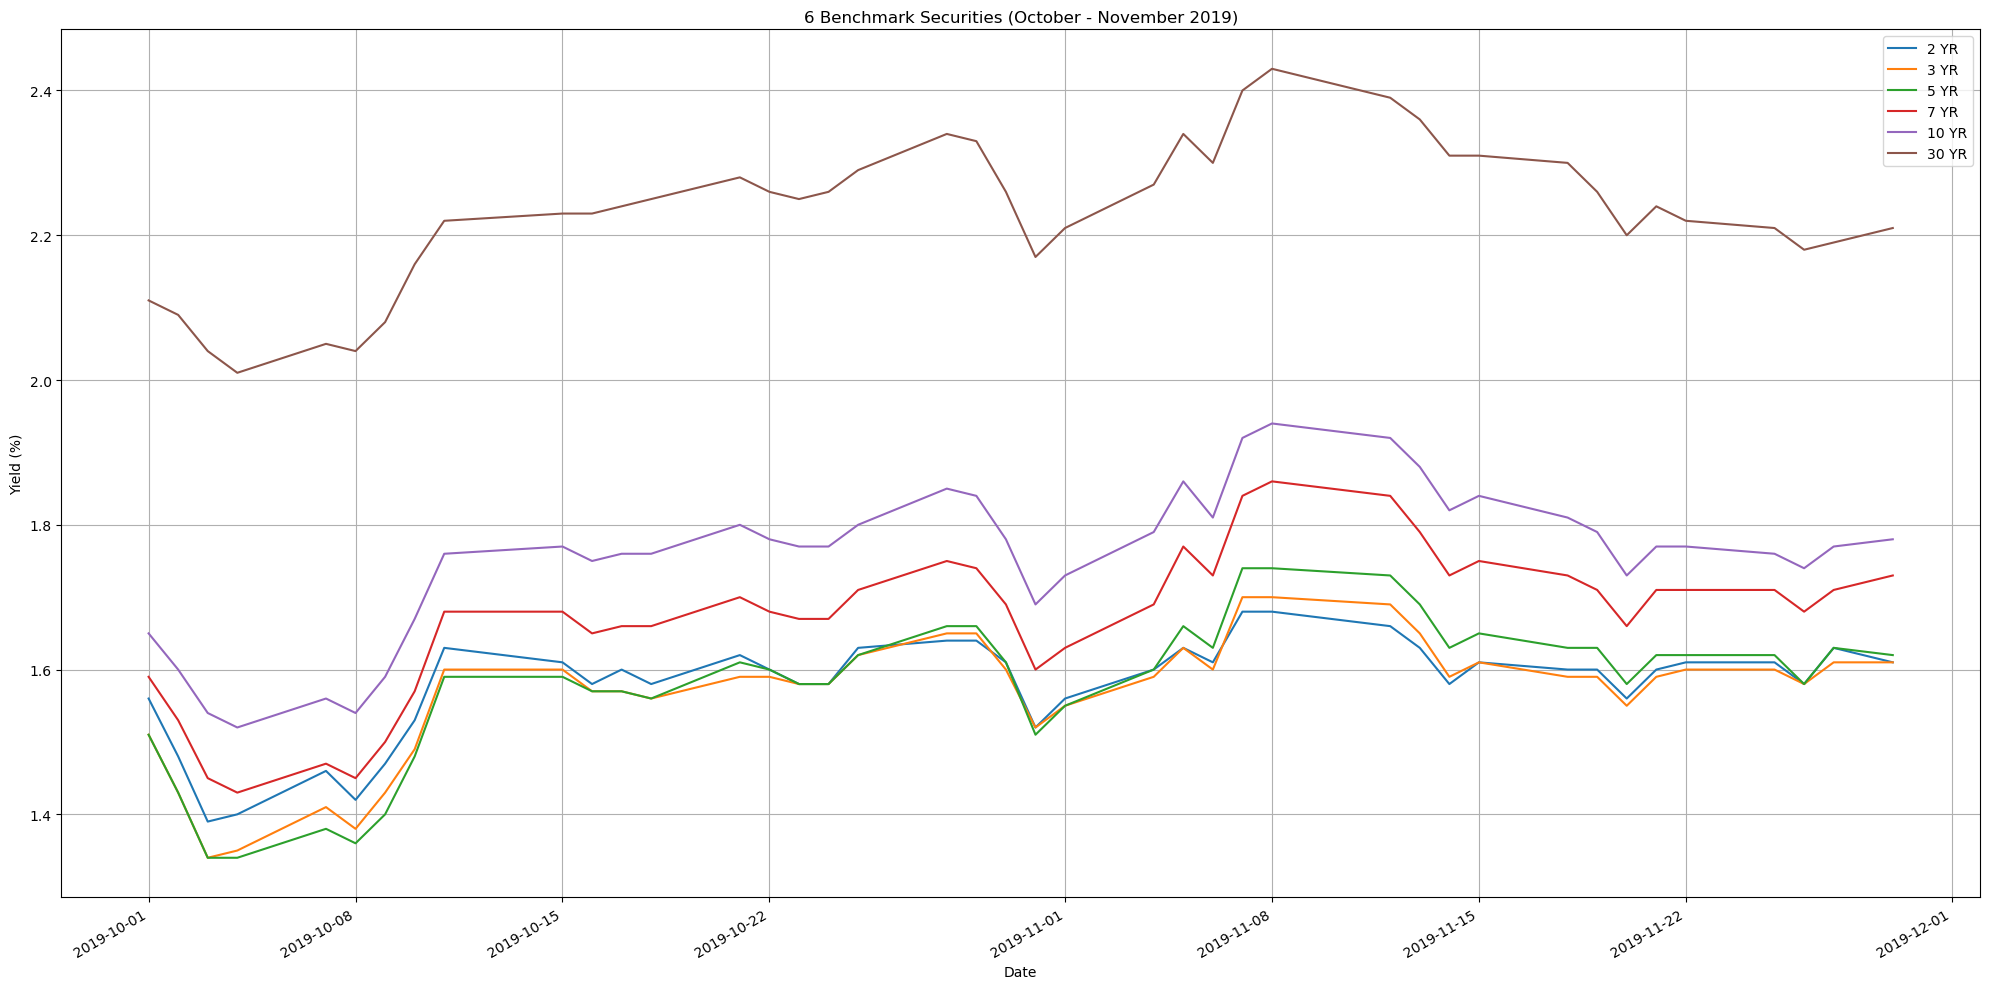

In [29]:
ax = tbonds_df.plot(grid=True,
                    title = "6 Benchmark Securities (October - November 2019)",
                    figsize=(20, 10))
ax.set_xlabel("Date")
ax.set_ylabel("Yield (%)")
fig = ax.get_figure()
fig.tight_layout()
plt.show()

### 4.2

On a separate graph, plot the gold ETF prices (not returns!) for the 2 months. Use the left-side axis for the price label

<Figure size 2400x1200 with 0 Axes>

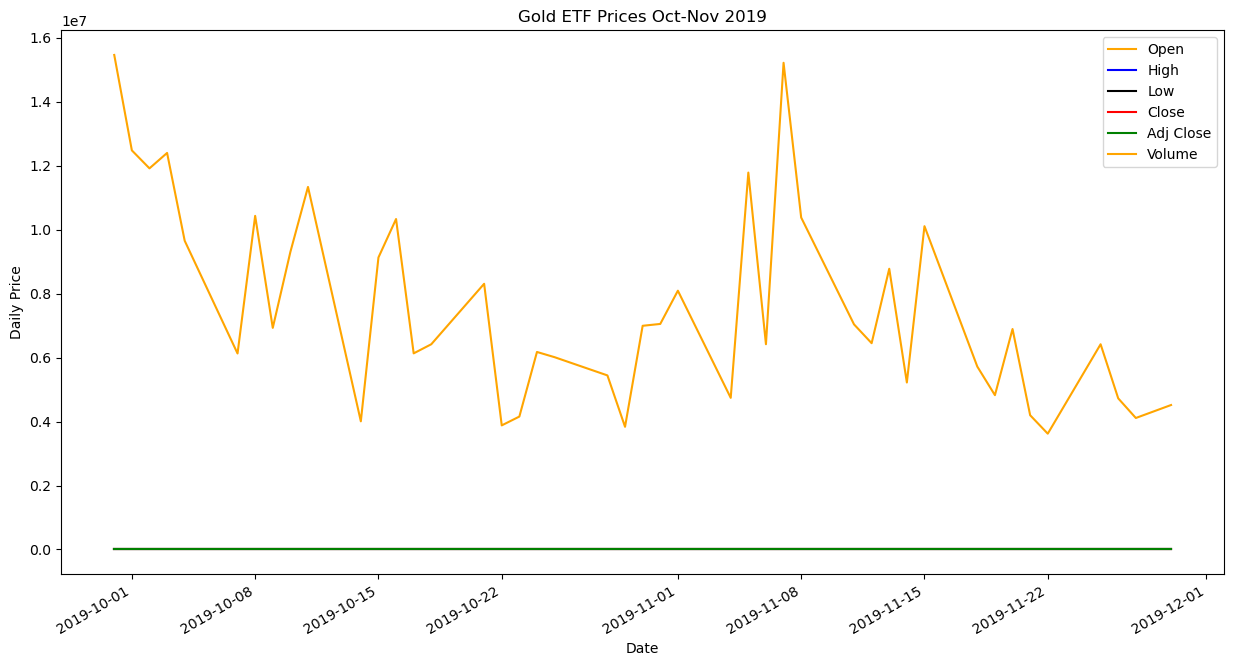

In [32]:
plt.figure(figsize=(16, 8), dpi=150)
gld_df.plot(label='Gold ETF', color=['orange', 'blue', 'black','red','green'])

# adding title to the plot
plt.title('Gold ETF Prices Oct-Nov 2019')
  
# adding Labels to the x-axis
plt.xlabel('Date')
plt.ylabel('Daily Price')
# adding legend to the curve
plt.legend()
plt.show()

### 4.3

On the same graph, plot the equity ETF prices (not returns!) for the 2 months. Be sure to use a separate scale, and the right-side axis for the price label

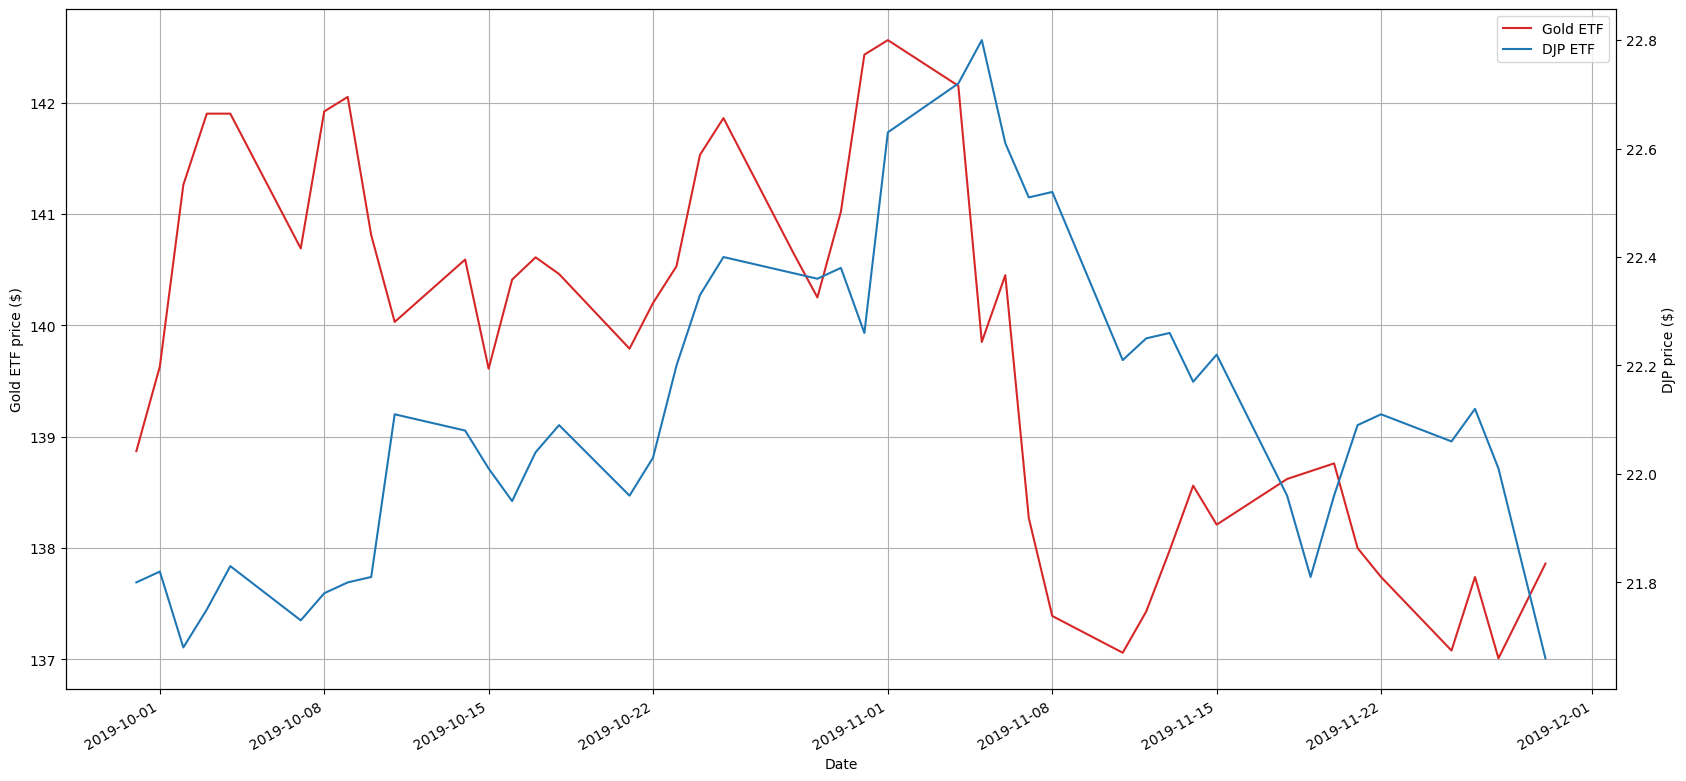

In [35]:
# Primary axis left side (Gold ETF)
ax = gld_df[['Adj Close']].plot(grid=True, figsize=(20, 10),
                               color='tab:red',
                               legend = False)
ax.set(ylabel = 'Gold ETF price ($)')

# Secondary axis right side (Equity ETF)
ax2 = ax.twinx()
djp_df[["Adj Close"]].plot(ax = ax2, legend = False)
ax2.set(ylabel = 'DJP price ($)')

# Legend for both y-axis
lines = ax.get_lines() + ax2.get_lines()
ax.legend(lines, ["Gold ETF","DJP ETF"], loc='upper right')
plt.show()

## Section 5. Fitting the Yield Curve

### 5.1

Fit the yield curve each day using the 6 benchmark yields for the October data

In [37]:
october_yields_df = tbonds_df[tbonds_df.index.month == 10]
#print(october_yields_df.info())
print(october_yields_df.head())

            2 YR  3 YR  5 YR  7 YR  10 YR  30 YR
Date                                            
2019-10-01  1.56  1.51  1.51  1.59   1.65   2.11
2019-10-02  1.48  1.43  1.43  1.53   1.60   2.09
2019-10-03  1.39  1.34  1.34  1.45   1.54   2.04
2019-10-04  1.40  1.35  1.34  1.43   1.52   2.01
2019-10-07  1.46  1.41  1.38  1.47   1.56   2.05


Fit yield curve using Nelson Siegel Model (three factors).

In [38]:
# Compute average yield for October across 2,3,5.7,10 and 30 years US treasury bond
y = october_yields_df.mean().to_numpy()
t = np.array([2, 3, 5, 7, 10, 30])

In [39]:
#curve, status = calibrate_nss_ols(t, y, tau0=(1,2))  # starting value of (1.0,2.0) for the optimization of tau
# starting value of (1.0,2.0) for the optimization of tau
curve1, status = calibrate_ns_ols(t, y, tau0=1)  
assert status.success
print(status)
print(curve1)

      fun: 0.0005396282408836351
 hess_inv: array([[634.41088257]])
      jac: array([-5.5172859e-07])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 10
     njev: 12
   status: 0
  success: True
        x: array([3.84331952])
NelsonSiegelCurve(beta0=2.534932569270512, beta1=-0.8131930862570771, beta2=-1.886447727871178, tau=3.8433195212704665)


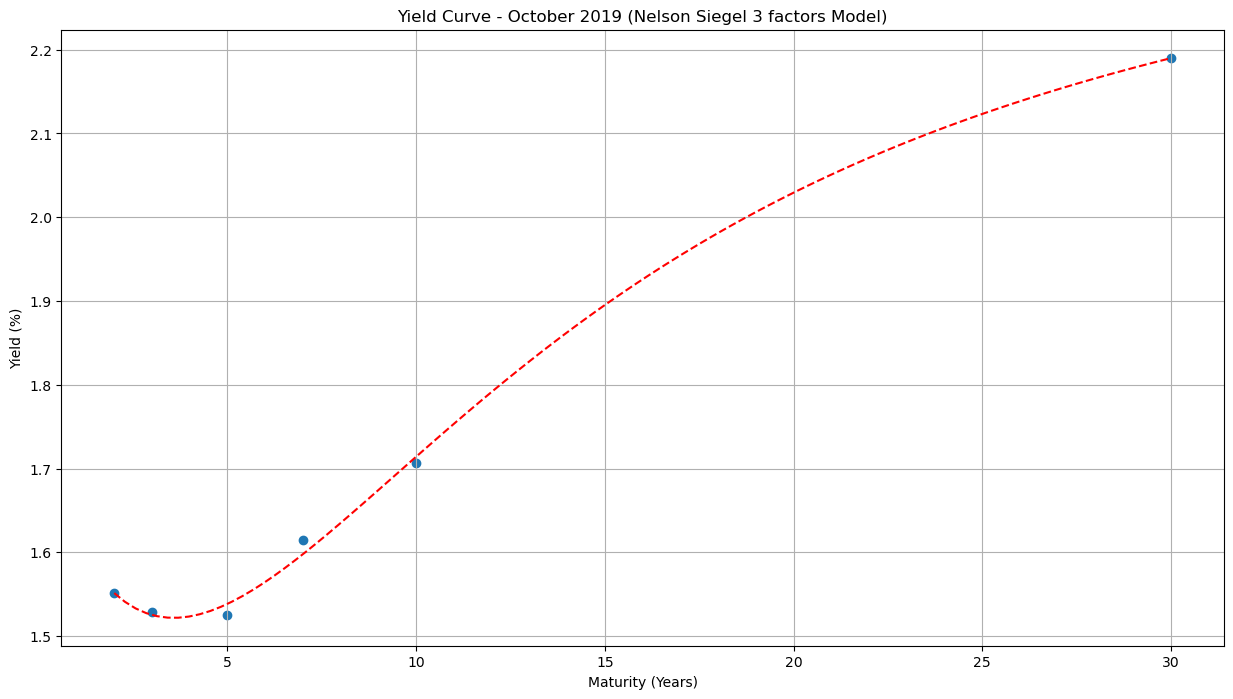

In [41]:
# Compute average yield for October across 2,3,5.7,10 and 30 years US treasury bond
y = october_yields_df.mean().to_numpy() 
t = np.array([2, 3, 5, 7, 10, 30])
plt.scatter(t, y)

#y = NelsonSiegelSvenssonCurve(curve1.beta0, curve1.beta1, curve1.beta2, curve1.beta3, curve1.tau1, curve1.tau2)
y1 = NelsonSiegelCurve(curve1.beta0, curve1.beta1, curve1.beta2, curve1.tau)
t = np.linspace(2, 30, 100)
plt.plot(t, y1(t), '--', color='red')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Yield Curve - October 2019 (Nelson Siegel 3 factors Model)')
plt.grid(True)
plt.show()

### 5.3

In [ ]:
Fitting the yield curve each day using the 6 benchmark yields for the November data

In [43]:
november_yields_df = tbonds_df[tbonds_df.index.month == 11]
#print(november_yields_df.info())

In [44]:
print(november_yields_df.head())

            2 YR  3 YR  5 YR  7 YR  10 YR  30 YR
Date                                            
2019-11-01  1.56  1.55  1.55  1.63   1.73   2.21
2019-11-04  1.60  1.59  1.60  1.69   1.79   2.27
2019-11-05  1.63  1.63  1.66  1.77   1.86   2.34
2019-11-06  1.61  1.60  1.63  1.73   1.81   2.30
2019-11-07  1.68  1.70  1.74  1.84   1.92   2.40


 Fit yield curve using Nelson Siegel Model (three factors).

In [46]:
 # Compute average yield for October across 2,3,5.7,10 and 30 years US treasury bond
y = november_yields_df.mean().to_numpy()
t = np.array([2, 3, 5, 7, 10, 30])

In [47]:
#curve, status = calibrate_nss_ols(t, y, tau0=(1,2))  # starting value of (1.0,2.0) for the optimization of tau
 # starting value of 1.0 for the optimization of tau
curve2, status = calibrate_ns_ols(t, y, tau0=1) 
assert status.success
print(status)
print(curve2)

      fun: 0.0007138814194978214
 hess_inv: array([[2247.17281933]])
      jac: array([-1.59747287e-06])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 11
     njev: 13
   status: 0
  success: True
        x: array([4.66116644])
NelsonSiegelCurve(beta0=2.655308996224282, beta1=-1.0001802964389108, beta2=-1.4339113618655608, tau=4.661166437598822)


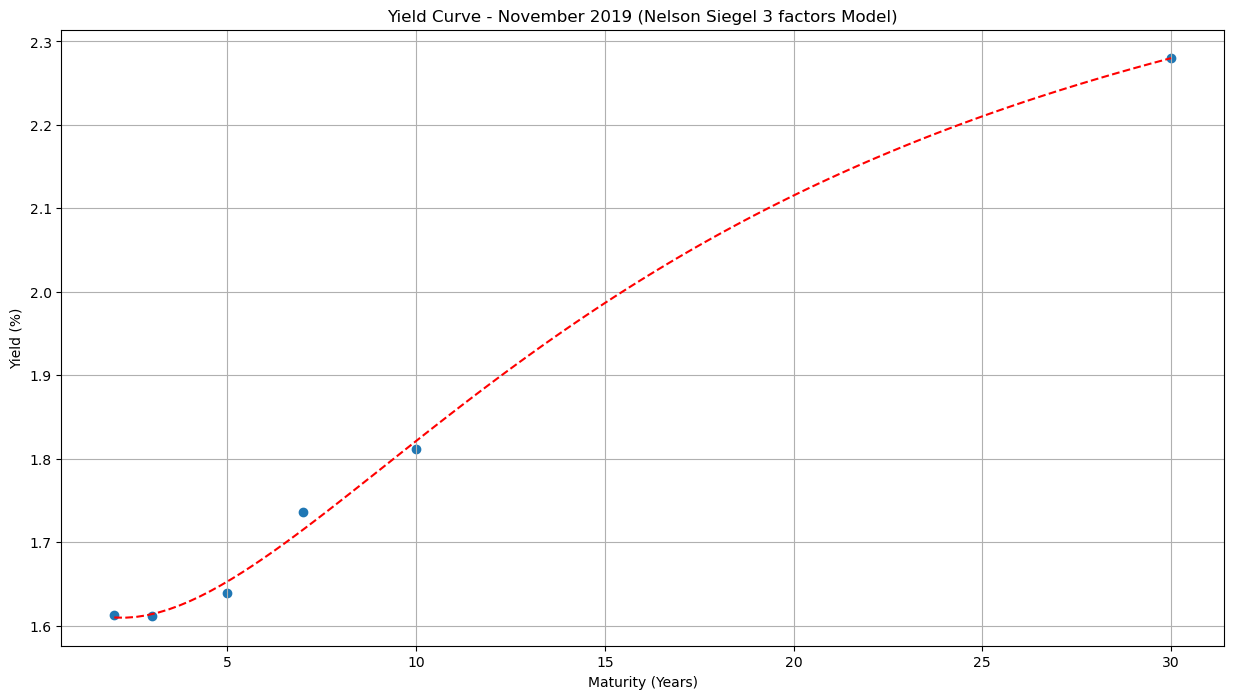

In [48]:
# Compute average yield for November across 2,3,5.7,10 and 30 years US treasury bond
y = november_yields_df.mean().to_numpy() 
t = np.array([2, 3, 5, 7, 10, 30])
plt.scatter(t, y)

#y = NelsonSiegelSvenssonCurve(curve2.beta0, curve2.beta1, curve2.beta2, curve2.beta3, curve2.tau1, curve2.tau2)
y2 = NelsonSiegelCurve(curve2.beta0, curve2.beta1, curve2.beta2, curve2.tau)
t = np.linspace(2, 30, 100)
plt.plot(t, y2(t), '--', color='red')
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Yield Curve - November 2019 (Nelson Siegel 3 factors Model)')
plt.grid(True)
plt.show()


Plotting two yield curves for side by side comparison

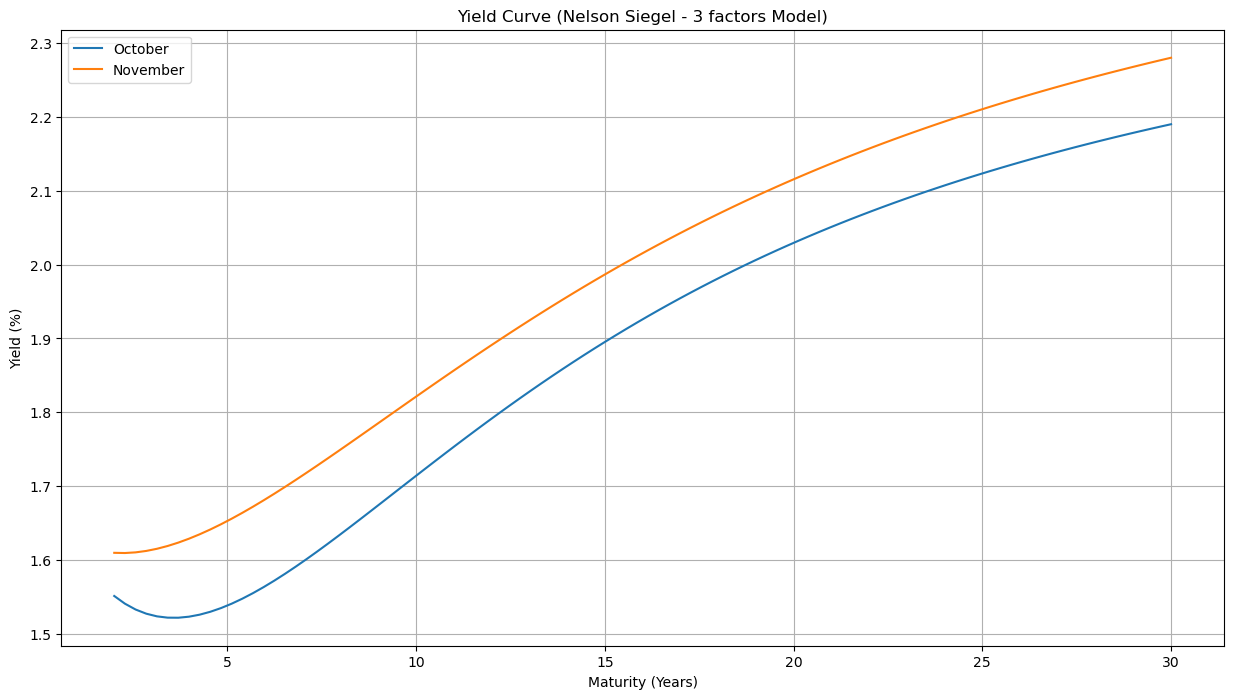

In [49]:
t = np.linspace(2, 30, 100)
plt.plot(t, y1(t), label = "October")
plt.plot(t, y2(t), label = "November")
plt.xlabel('Maturity (Years)')
plt.ylabel('Yield (%)')
plt.title('Yield Curve (Nelson Siegel - 3 factors Model)')
plt.grid(True)
plt.legend()
plt.show()

The long term rate β0 is greater for November as compared to October. The short term component β1 decays faster for November as compared to October .The medium term component decays faster for October compared to November The τ for October is less than that for November, implying that the October yield curve is better suited for long term maturities, while that of November is suited for a shorter term maturities.The yield curve in October had a long term horizon whereas that of November has a shorter horizon.\ Yield curve in November is larger than October for all six benchmarks (2,3,5,7,10 and 30 years).

## Section 6. Modeling Prices

### 6.1

Using the October gold ETF prices, run an ARMA model with your choice of parameters.

In [50]:
october_gold_df = gld_df[gld_df.index.month == 10]
#print(october_gold_df.info())

In [51]:
print(october_gold_df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-10-01  138.070007  140.190002  137.800003  139.630005  139.630005   
2019-10-02  140.789993  141.880005  140.460007  141.259995  141.259995   
2019-10-03  141.360001  143.250000  141.289993  141.899994  141.899994   
2019-10-04  141.479996  142.309998  141.139999  141.899994  141.899994   
2019-10-07  141.160004  141.770004  140.240005  140.690002  140.690002   

              Volume  
Date                  
2019-10-01  12476200  
2019-10-02  11914300  
2019-10-03  12396100  
2019-10-04   9651000  
2019-10-07   6127200  


Performing Augmented Dickey Fuller Test (ADF Test) to check for time-series stationary.

In [52]:
# Perform ADF Test for stationary (null non-stationary, alternative stationary)
series = october_gold_df['Adj Close'].dropna()
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: -1.9943952807326568
n_lags: 0.28903596759497396
p-value: 0.28903596759497396


So, in our case, if P-value > 0.05 we go ahead with finding the order of differencing. Using significance level (0.05) then we cannot reject the null hypothesis and infer that the time series is indeed non-stationary.

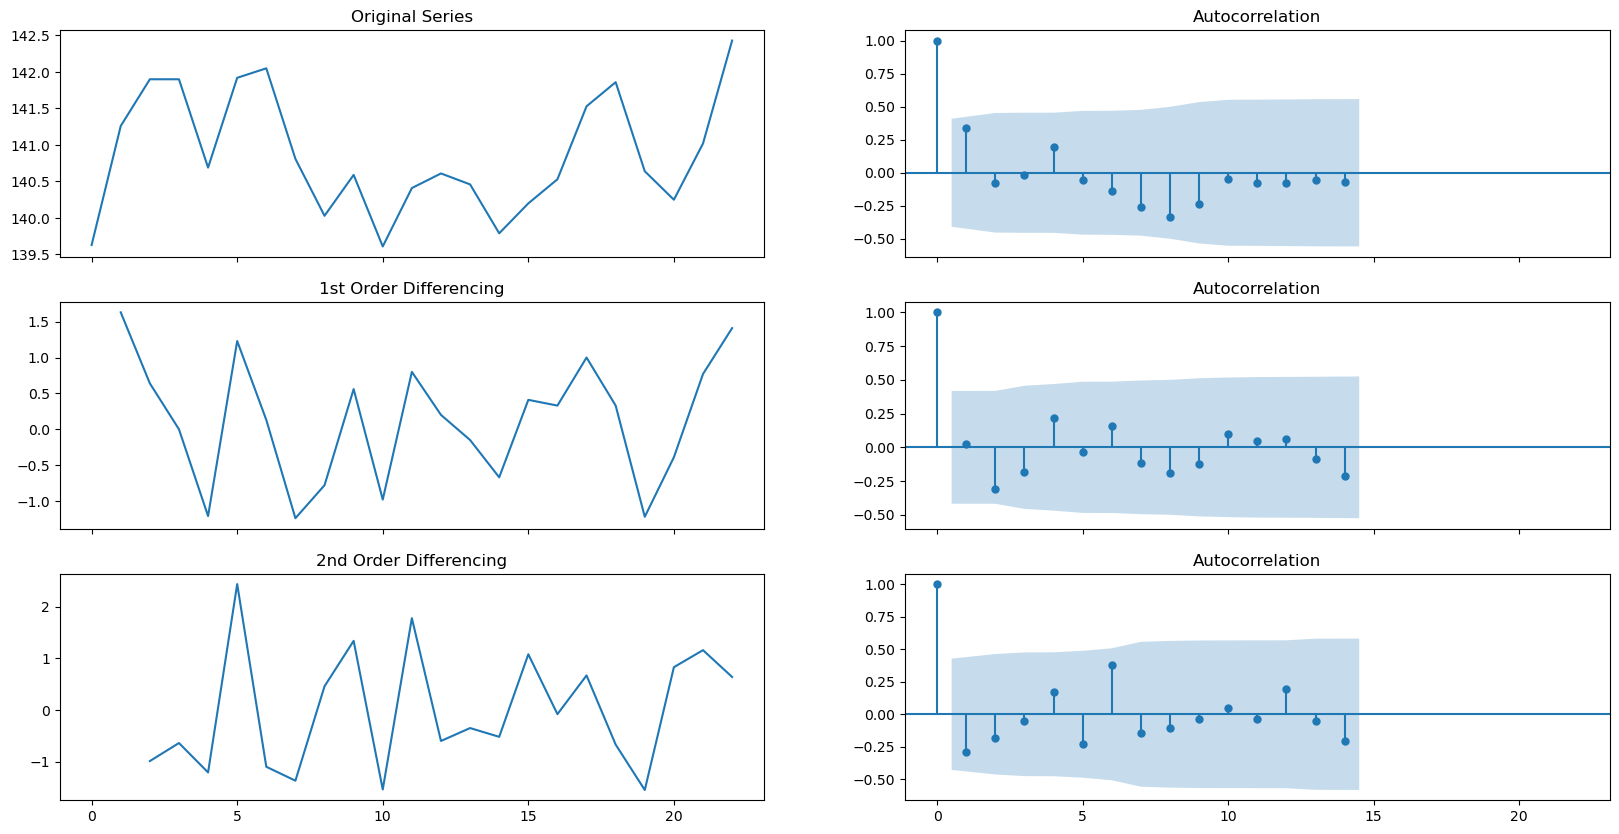

In [53]:
# Original Series
df = october_gold_df[['Adj Close']].rename(columns={'Adj Close':'adj_close'}).reset_index()[['adj_close']]
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))
axes[0, 0].plot(df.adj_close); axes[0, 0].set_title('Original Series')
plot_acf(df.adj_close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.adj_close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.adj_close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.adj_close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.adj_close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Finding the order of AR term(p)

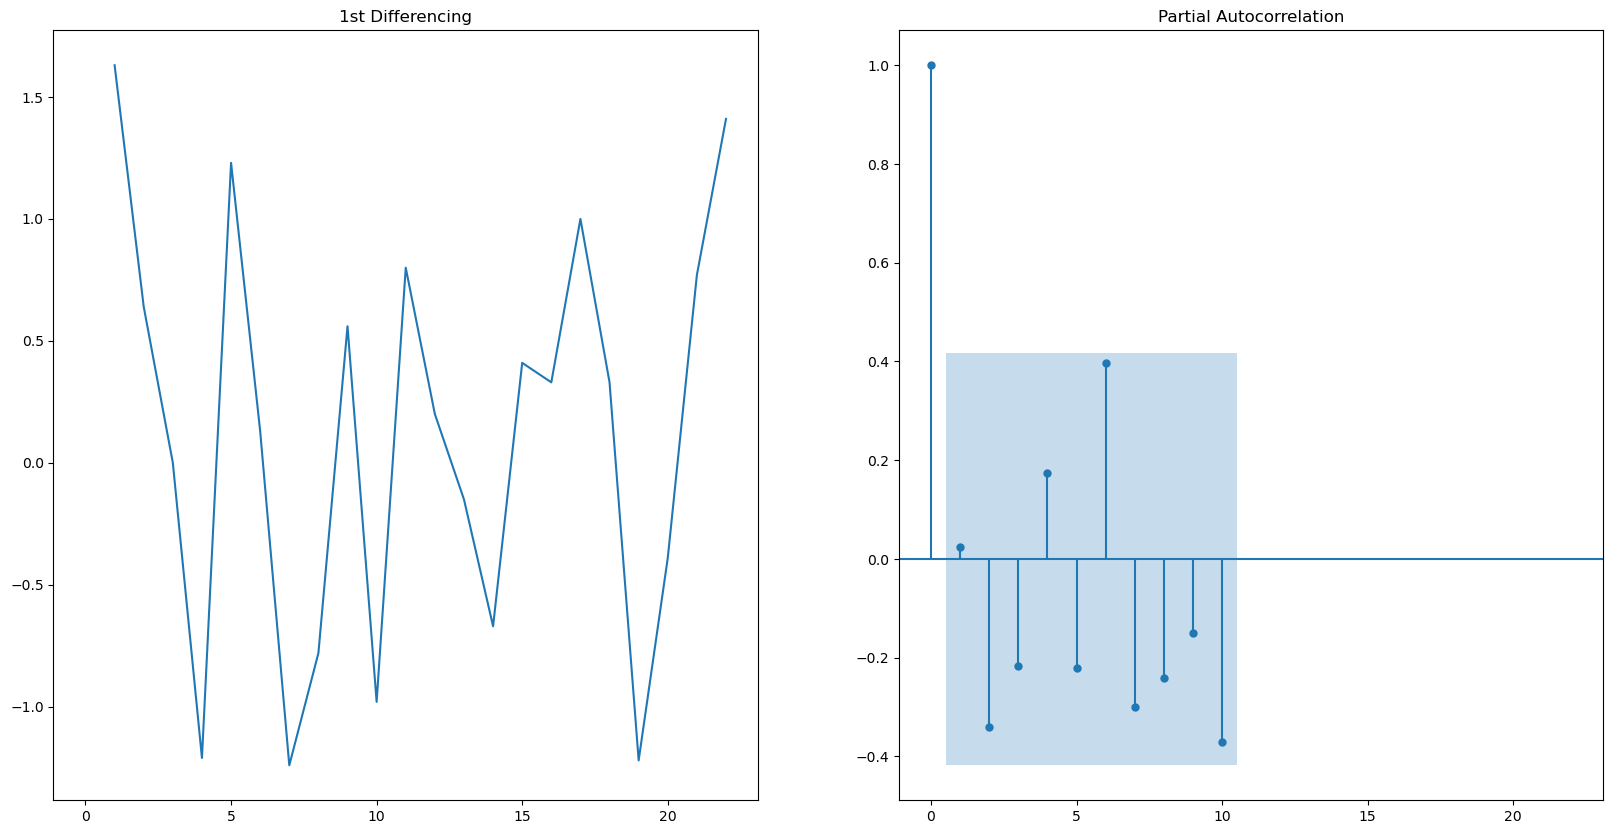

In [54]:
# PACF plot of original series
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
axes[0].plot(df.adj_close.diff()); axes[0].set_title('1st Differencing')
plot_pacf(df.adj_close.diff().dropna(), lags=10, ax=axes[1])
plt.show()

No lag turns out to be significant. We are going to be tentatively fix the p as 0

Finding the order of MA term(q)

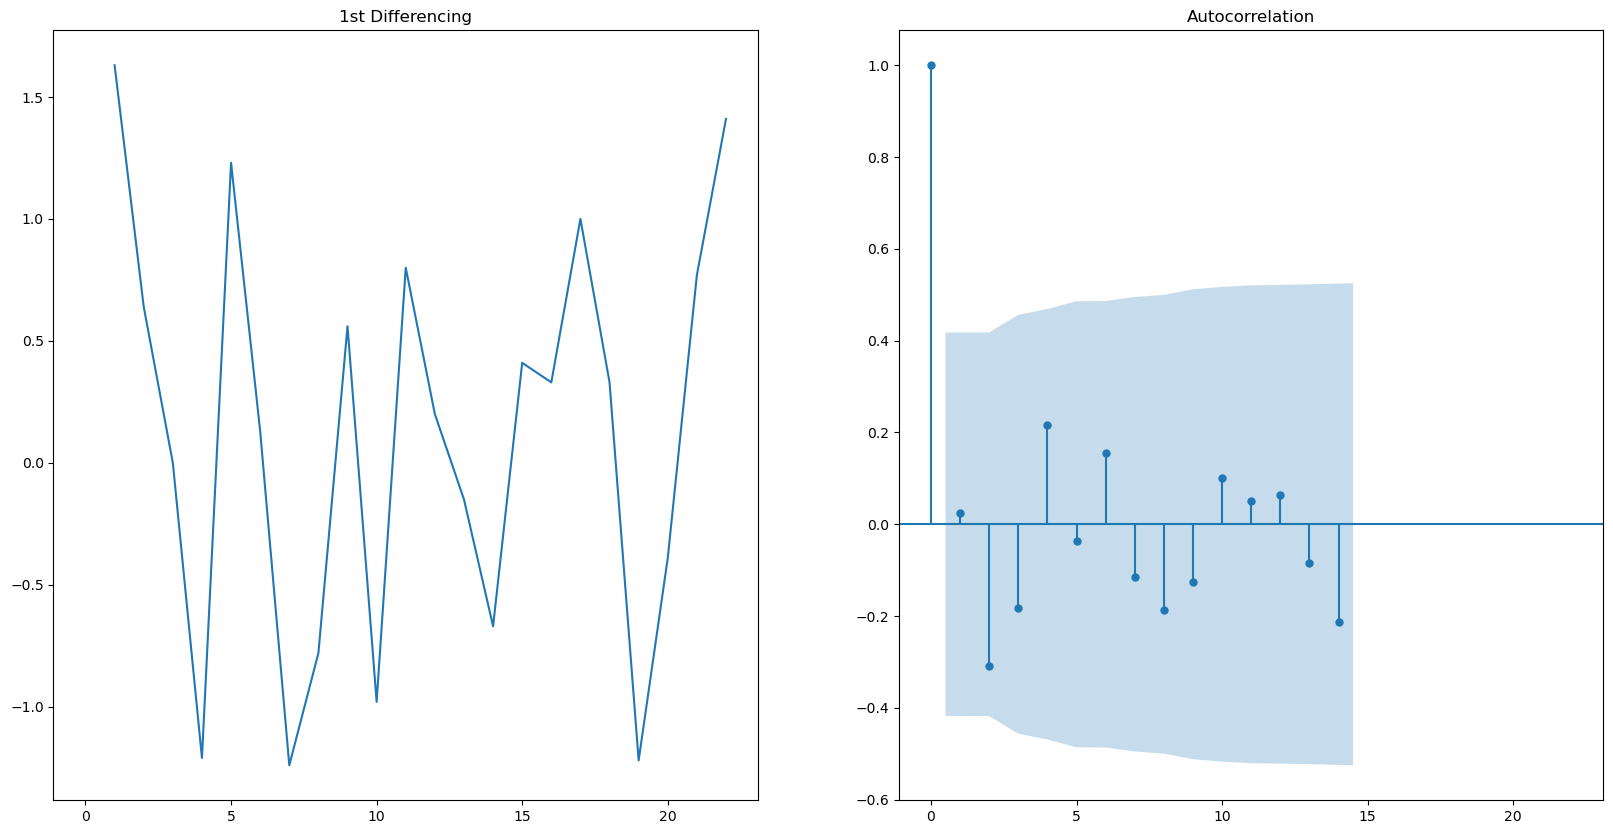

In [55]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
axes[0].plot(df.adj_close.diff().dropna()); axes[0].set_title('1st Differencing')
#axes[0].set(xlim=(-1,15))
plot_acf(df.adj_close.diff().dropna(), ax=axes[1])

plt.show()

Let’s tentatively fix q as 0.

In [56]:
# 1,1,1 ARIMA Model
model = ARIMA(df.adj_close, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.adj_close   No. Observations:                   22
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -26.168
Method:                       css-mle   S.D. of innovations              0.760
Date:                Fri, 29 Apr 2022   AIC                             60.337
Time:                        16:09:28   BIC                             64.701
Sample:                             1   HQIC                            61.365
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0341      0.054      0.630      0.529      -0.072       0.140
ar.L1.D.adj_close     0.5633      0.242      2.333      0.020       0.090       1.037
ma.L1.D.adj_close    -1.

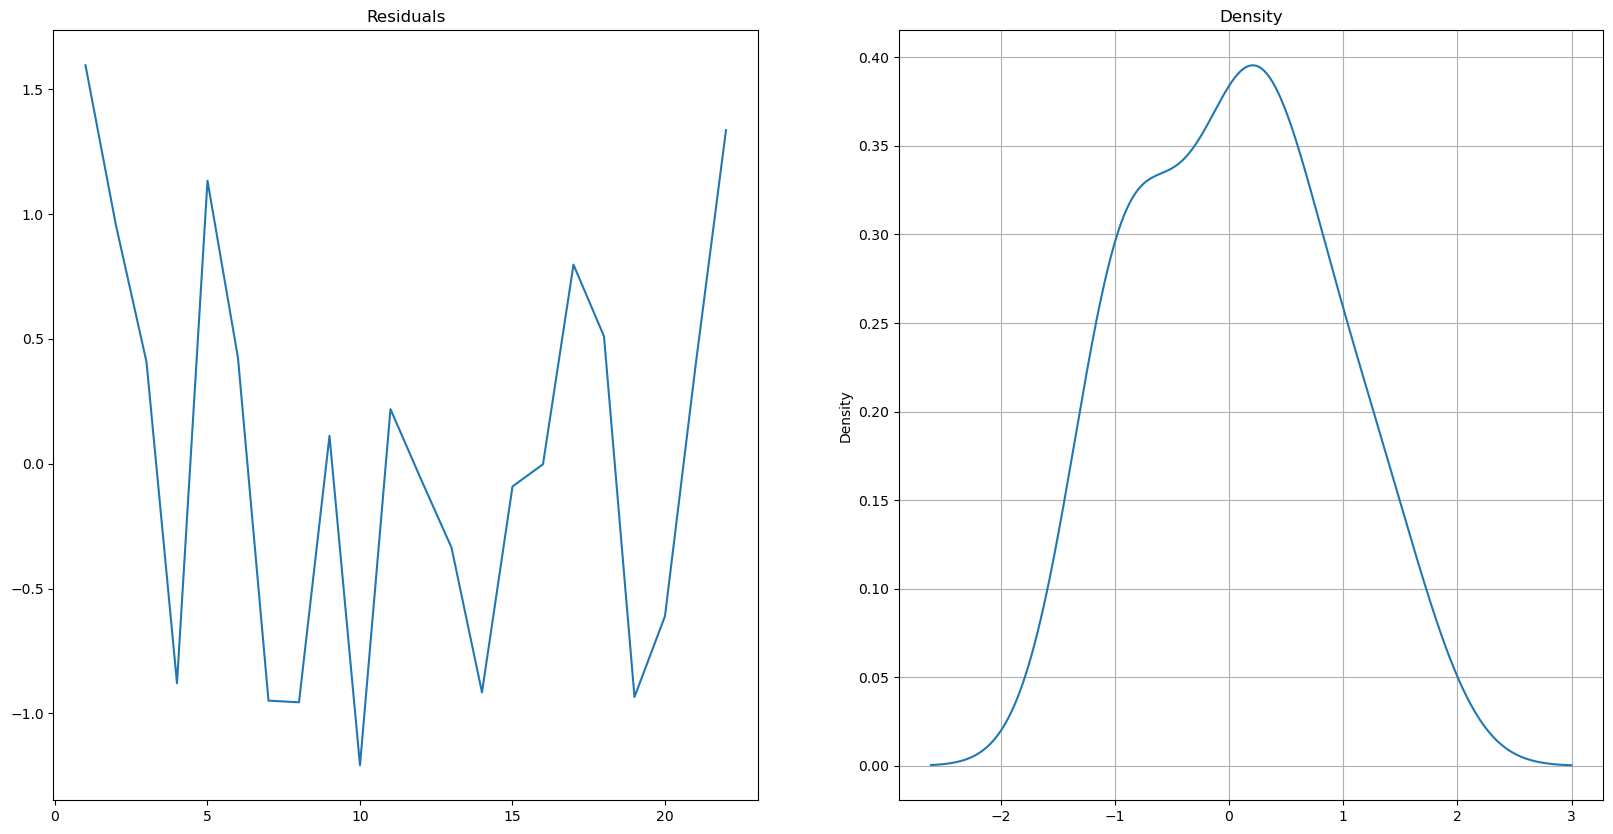

In [57]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(20,10))
residuals.plot(title="Residuals", ax=ax[0], legend=False)
residuals.plot(kind='kde', title='Density', ax=ax[1], legend=False, grid=True)
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

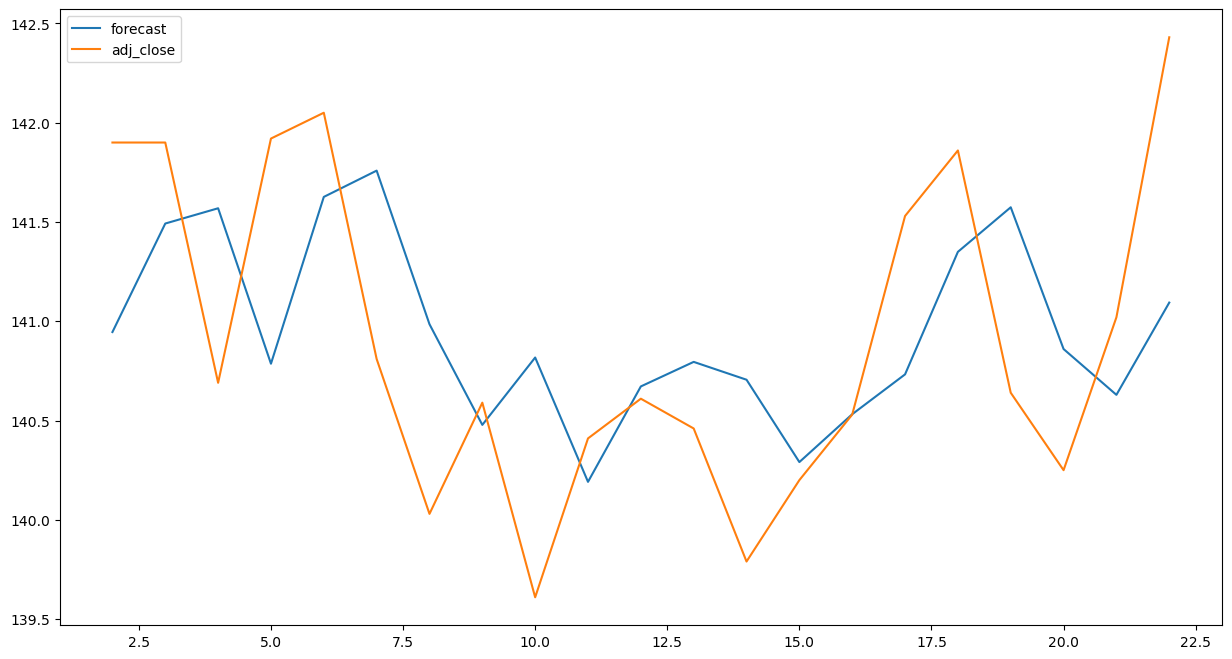

In [58]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

The P-values of the AR1 and MA1 terms have improved and are highly significant (<0.05).

We choose ARIMA (1,1,1) - 1 lag, 1 time difference and 1 moving average term.

### 6.2

Using the November gold ETF prices, run an ARMA model with your choice of parameters.

In [59]:
november_gold_df = gld_df[gld_df.index.month == 11]
#print(november_gold_df.info())

In [60]:
print(november_gold_df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-11-01  142.210007  142.899994  142.009995  142.559998  142.559998   
2019-11-04  142.259995  142.449997  141.740005  142.149994  142.149994   
2019-11-05  140.649994  140.889999  139.380005  139.850006  139.850006   
2019-11-06  140.119995  140.789993  140.000000  140.449997  140.449997   
2019-11-07  140.110001  140.199997  137.600006  138.270004  138.270004   

              Volume  
Date                  
2019-11-01   8090000  
2019-11-04   4740300  
2019-11-05  11782300  
2019-11-06   6416500  
2019-11-07  15214200  


Performing Augmented Dickey Fuller Test (ADF Test) to check for time-series stationary.

In [61]:
# Perform ADF Test for stationary (null non-stationary, alternative stationary)
series = november_gold_df['Adj Close'].dropna()
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')    

ADF Statistic: -2.9501738083658315
n_lags: 0.0398168601374712
p-value: 0.0398168601374712


So, in our case, if P-value > 0.05 we go ahead with finding the order of differencing. Using significance level (0.05) then we cannot reject the null hypothesis and infer that the time series is indeed non-stationary.

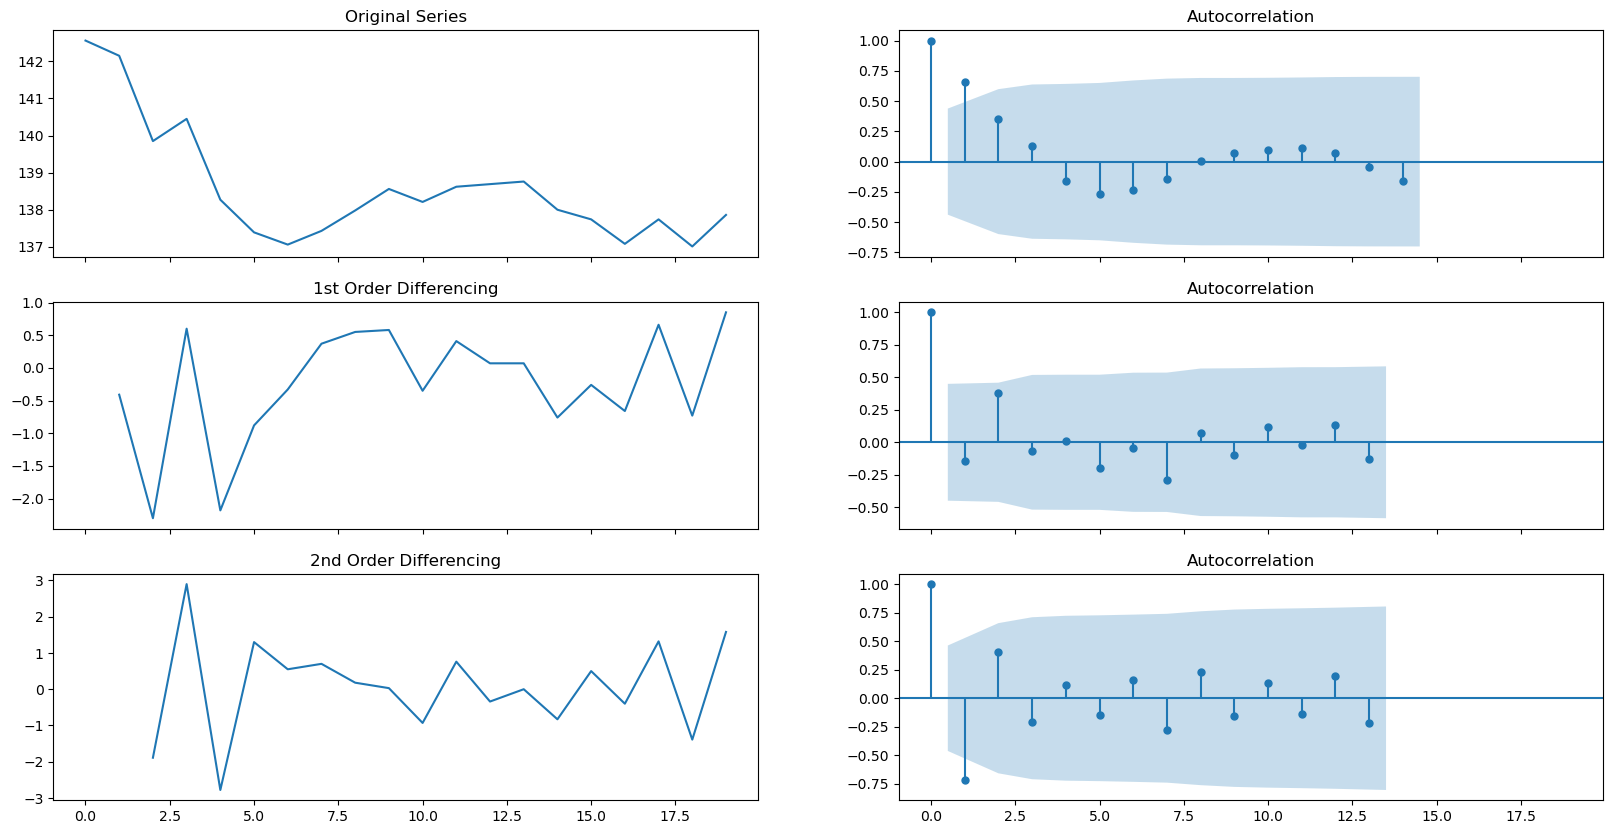

In [62]:
# Original Series
df = november_gold_df[['Adj Close']].rename(columns={'Adj Close':'adj_close'}).reset_index()[['adj_close']]
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))
axes[0, 0].plot(df.adj_close); axes[0, 0].set_title('Original Series')
plot_acf(df.adj_close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.adj_close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.adj_close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.adj_close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.adj_close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Finding the order of AR term(p)

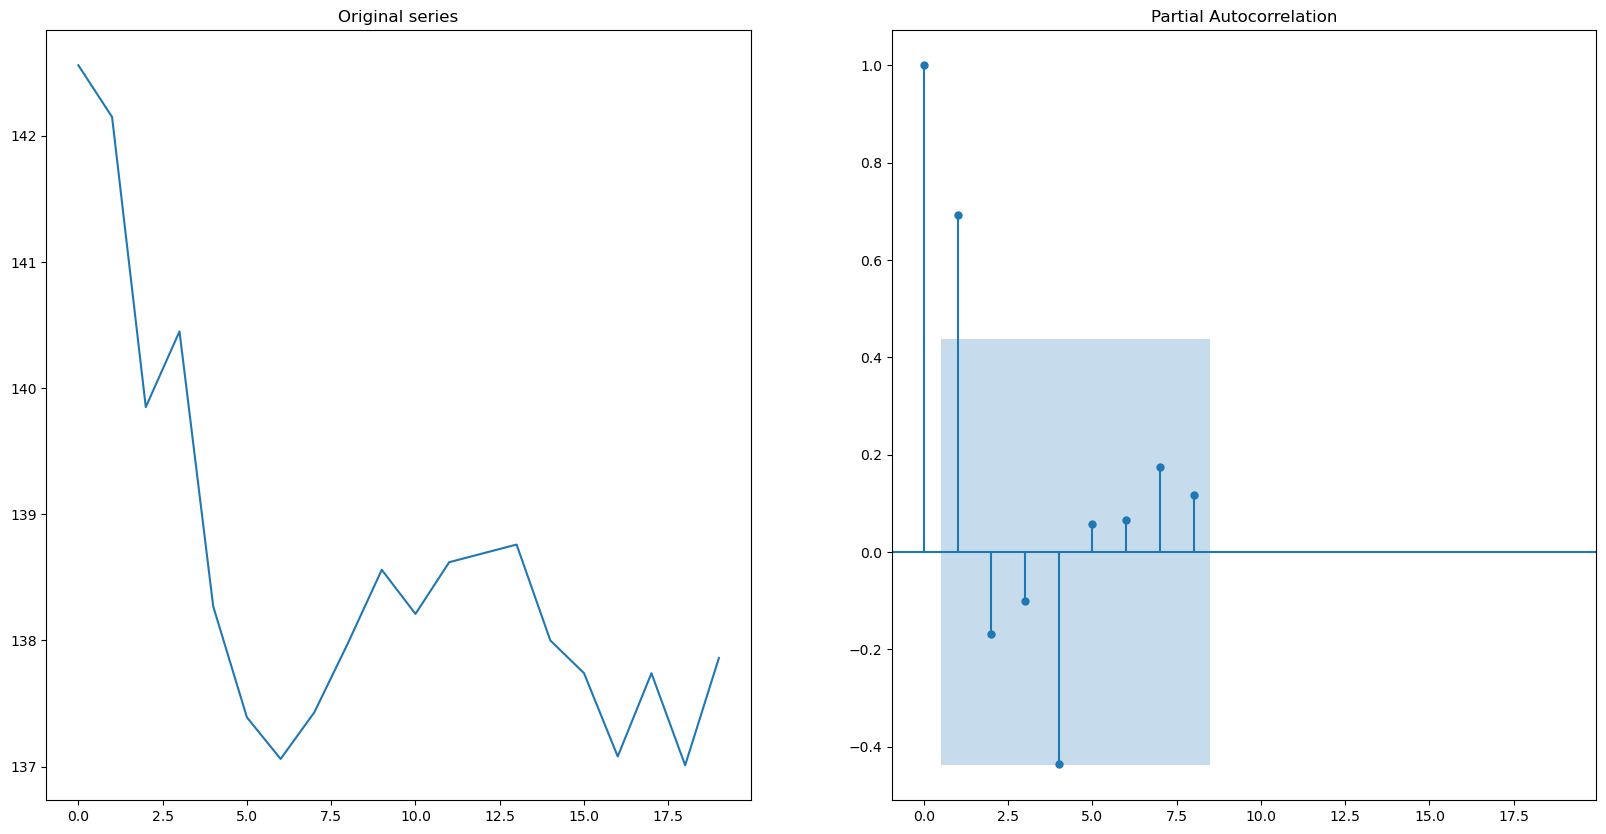

In [63]:
# PACF plot of original series
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
axes[0].plot(df.adj_close.dropna()); axes[0].set_title('Original series')
plot_pacf(df.adj_close.dropna(), lags=8, ax=axes[1])
plt.show()

You can observe that the PACF lag 4 is quite significant since is well above the significance line. We are going to be tentatively fix the p as 4.

Finding the order of MA term(q)

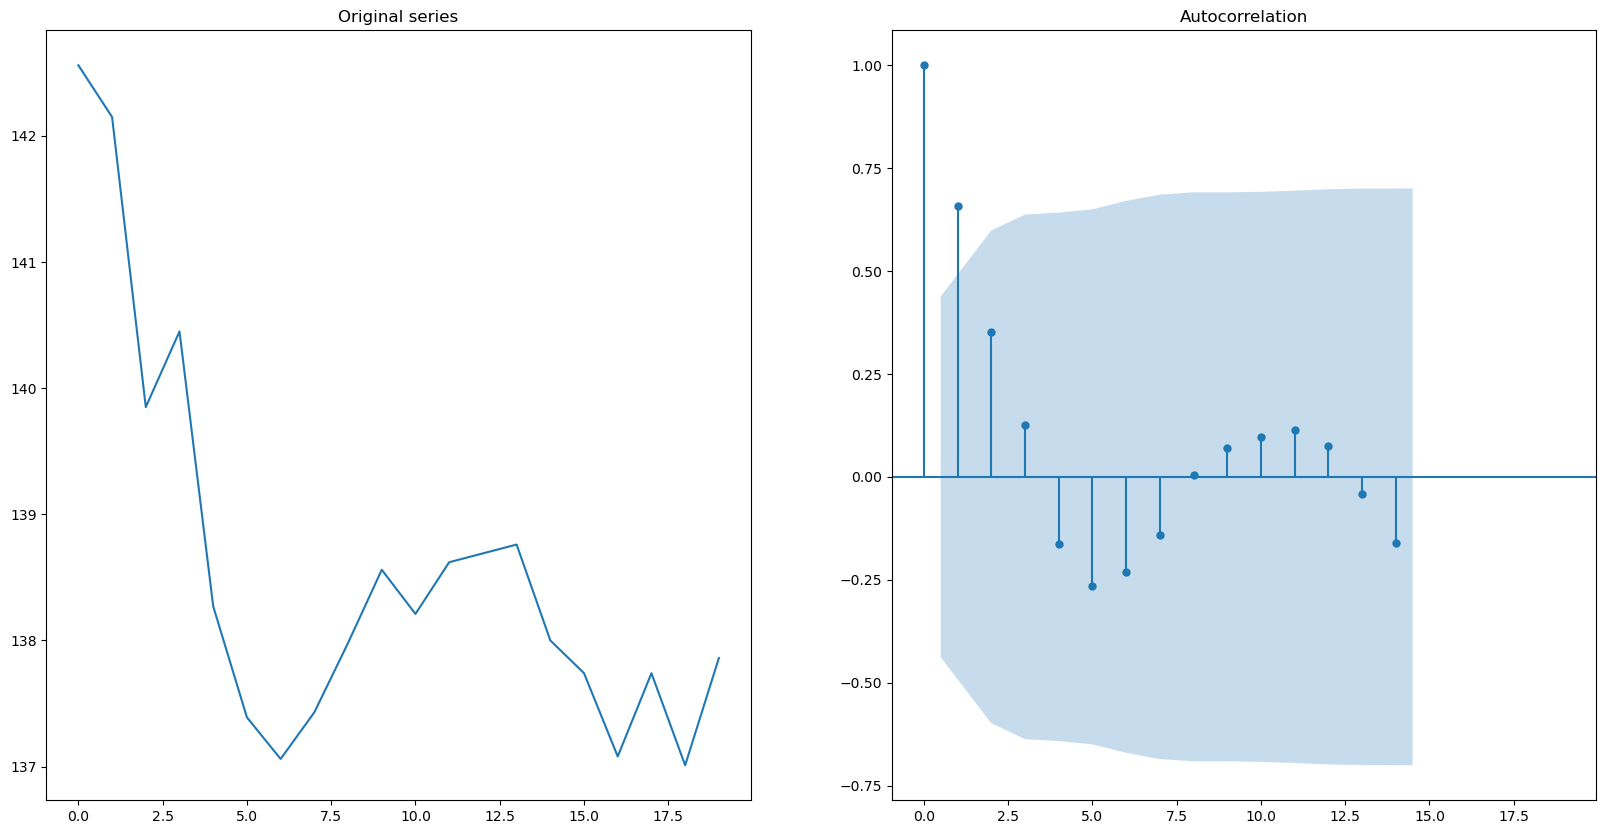

In [64]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
axes[0].plot(df.adj_close); axes[0].set_title('Original series')
plot_acf(df.adj_close.dropna(), ax=axes[1])

plt.show()

Let’s tentatively fix q as 1.

In [65]:
# 1,0,2 ARIMA Model
model = ARIMA(df.adj_close, order=(1,0,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:              adj_close   No. Observations:                   20
Model:                     ARMA(1, 2)   Log Likelihood                 -24.348
Method:                       css-mle   S.D. of innovations              0.687
Date:                Fri, 29 Apr 2022   AIC                             58.696
Time:                        16:17:27   BIC                             63.675
Sample:                             0   HQIC                            59.668
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             139.4469      1.476     94.484      0.000     136.554     142.340
ar.L1.adj_close     0.7884      0.173      4.557      0.000       0.449       1.128
ma.L1.adj_close     0.2973      

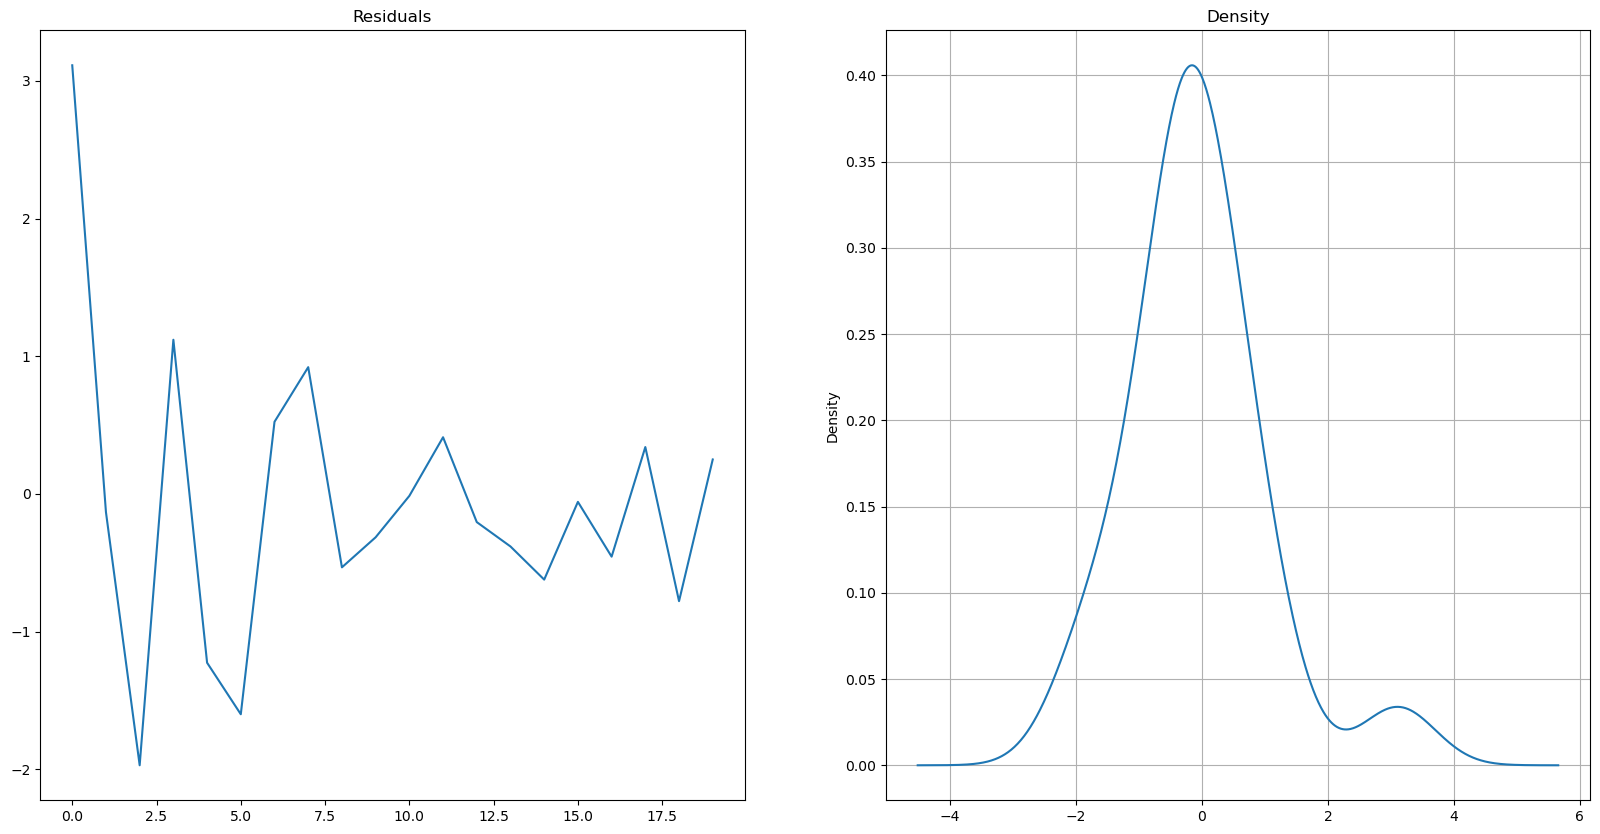

In [66]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(20,10))
residuals.plot(title="Residuals", ax=ax[0], legend=False)
residuals.plot(kind='kde', title='Density', ax=ax[1], legend=False, grid=True)
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

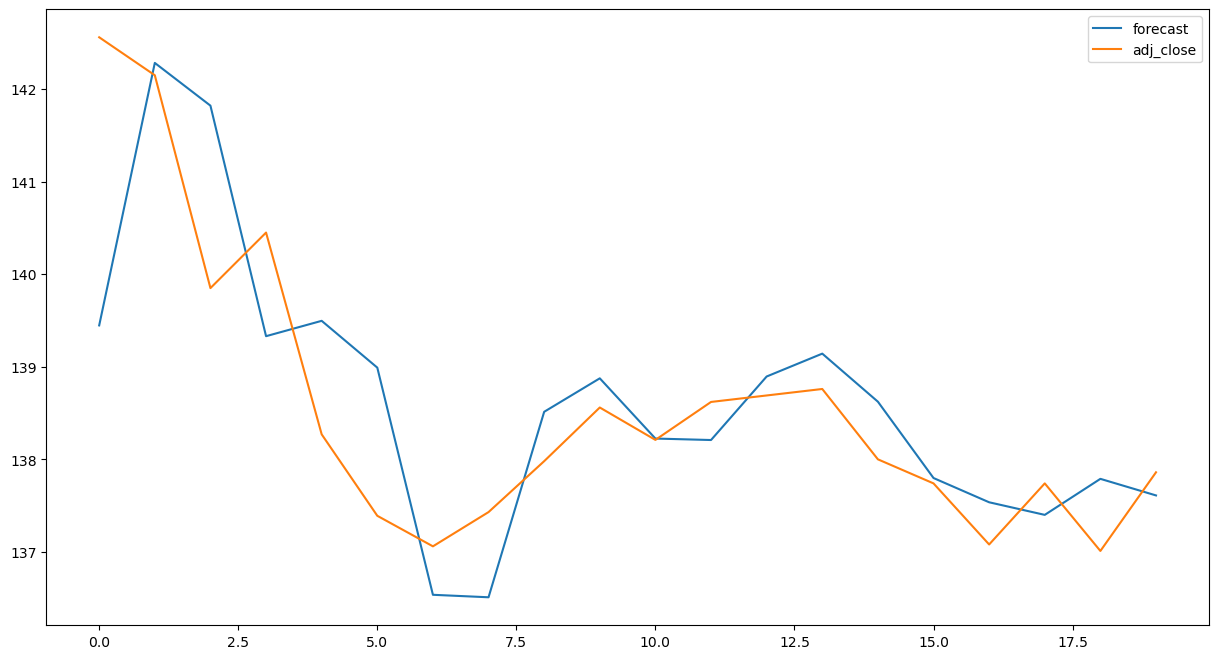

In [67]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

We choose ARIMA (1,0,2) - 1 lag, 0 time difference and 2 moving average term.

### 6.3

Using the October equity ETF prices, run an ARMA model with your choice of parameters

In [68]:
october_djp_df = djp_df[djp_df.index.month == 10]
#print(october_djp_df.info())

In [69]:
print(october_djp_df.head())

                 Open       High        Low  Close  Adj Close   Volume
Date                                                                  
2019-10-01  21.820000  21.820000  21.740000  21.82      21.82  1489800
2019-10-02  21.770000  21.820000  21.610001  21.68      21.68   151400
2019-10-03  21.540001  21.780001  21.530001  21.75      21.75    93000
2019-10-04  21.750000  21.860001  21.750000  21.83      21.83    99300
2019-10-07  21.990000  21.990000  21.709999  21.73      21.73   100300


Performing Augmented Dickey Fuller Test (ADF Test) to check for time-series stationary.

In [70]:
# Perform ADF Test for stationary (null non-stationary, alternative stationary)
series = october_djp_df['Adj Close'].dropna()
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')    

ADF Statistic: 1.0204879561332034
n_lags: 0.9944774848339569
p-value: 0.9944774848339569


So, in our case, if P-value > 0.05 we go ahead with finding the order of differencing. Using significance level (0.05) then we cannot reject the null hypothesis and infer that the time series is indeed non-stationary.

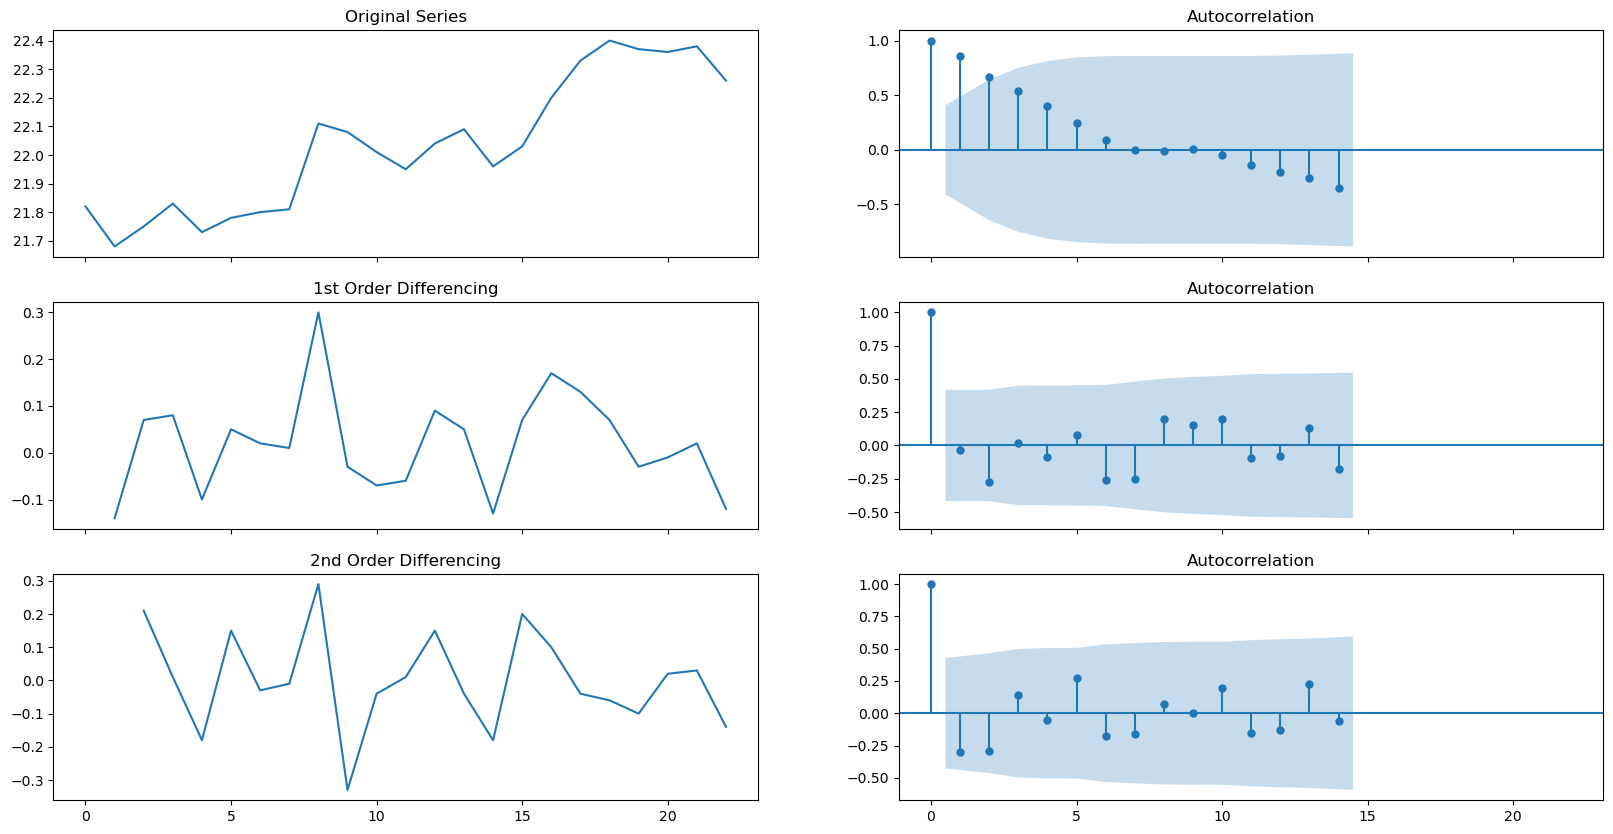

In [71]:
# Original Series
df = october_djp_df[['Adj Close']].rename(columns={'Adj Close':'adj_close'}).reset_index()[['adj_close']]
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))
axes[0, 0].plot(df.adj_close); axes[0, 0].set_title('Original Series')
plot_acf(df.adj_close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.adj_close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.adj_close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.adj_close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.adj_close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Finding the order of AR term(p)

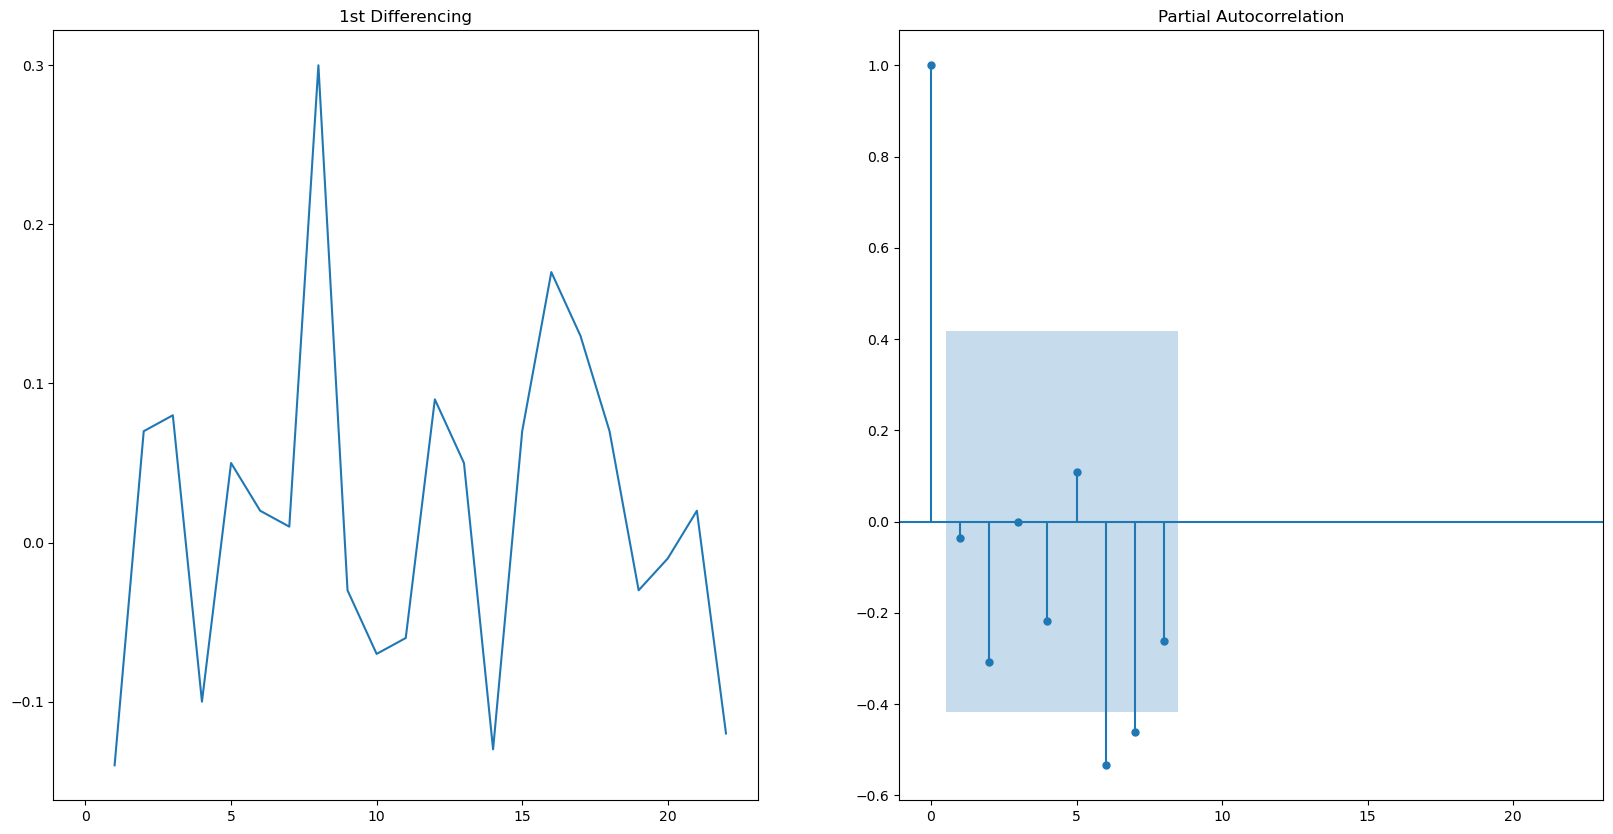

In [72]:
# PACF plot of 1st difference eries
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
axes[0].plot(df.adj_close.diff().dropna()); axes[0].set_title('1st Differencing')
plot_pacf(df.adj_close.diff().dropna(), lags=8, ax=axes[1])
plt.show()

Let’s tentatively fix q as 0.

In [73]:
# 2,1,1 ARIMA Model
model = ARIMA(df.adj_close, order=(2,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.adj_close   No. Observations:                   22
Model:                 ARIMA(2, 1, 1)   Log Likelihood                  21.740
Method:                       css-mle   S.D. of innovations              0.084
Date:                Fri, 29 Apr 2022   AIC                            -33.479
Time:                        16:23:11   BIC                            -28.024
Sample:                             1   HQIC                           -32.194
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0303      0.004      7.661      0.000       0.023       0.038
ar.L1.D.adj_close     0.5712      0.233      2.450      0.014       0.114       1.028
ar.L2.D.adj_close    -0.

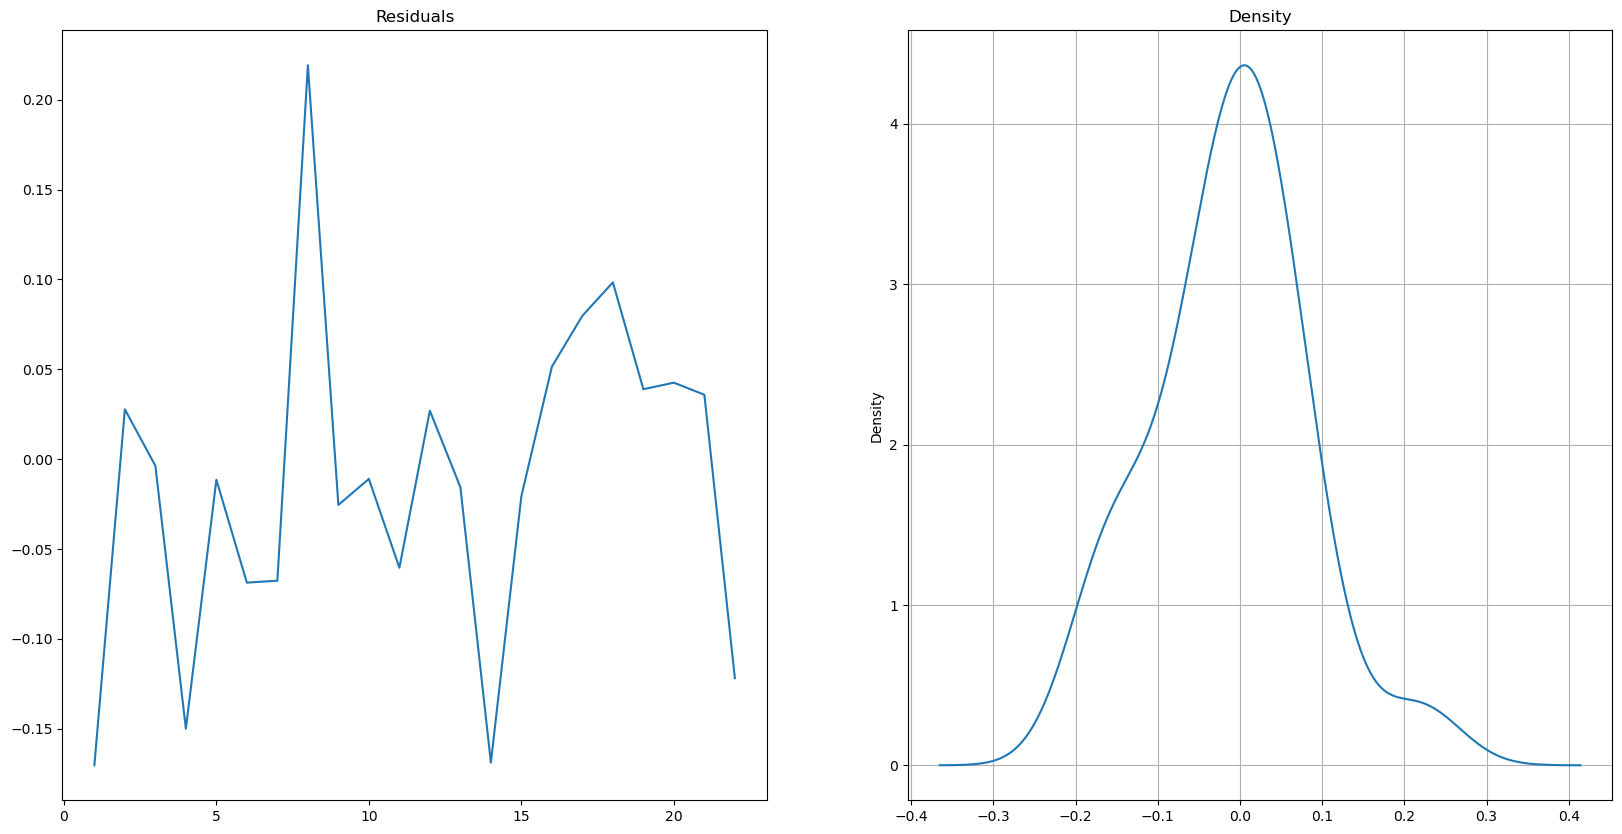

In [74]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(20,10))
residuals.plot(title="Residuals", ax=ax[0], legend=False)
residuals.plot(kind='kde', title='Density', ax=ax[1], legend=False, grid=True)
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

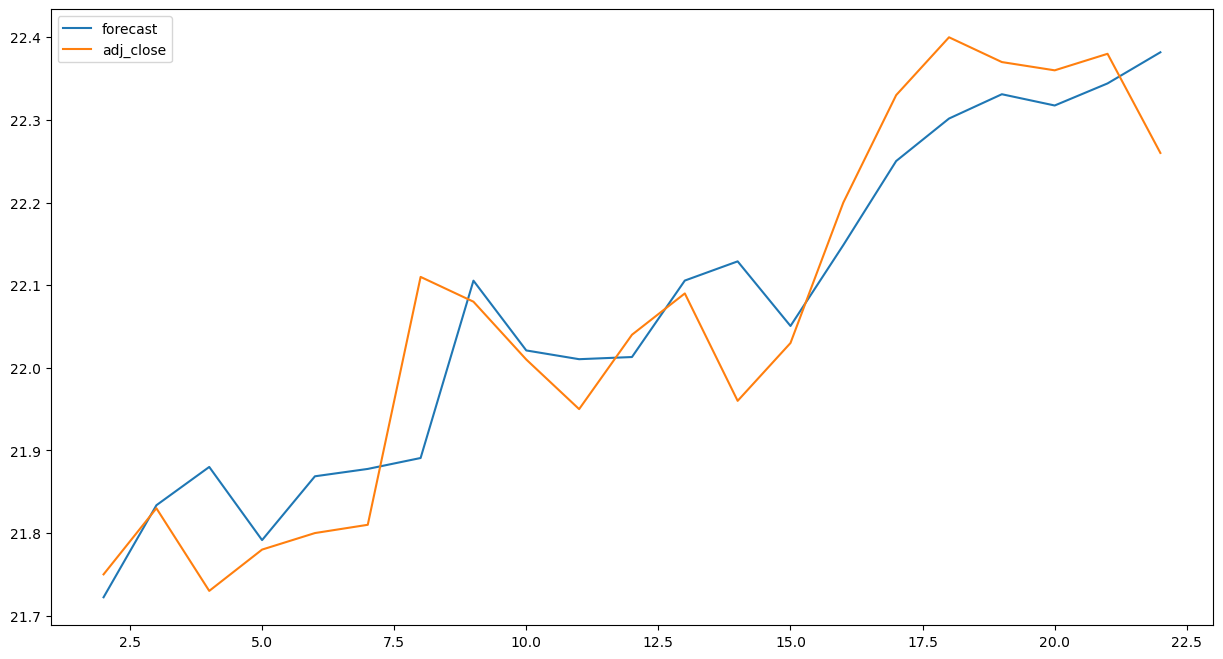

In [75]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

We choose ARIMA (2,1,1) - 2 lags, 1 time difference and 1 moving average term.

### 6.4

Using the November equity ETF prices, run an ARMA model with your choice of parameters.
In each case, justify which model is best.

In [76]:
november_djp_df = djp_df[djp_df.index.month == 11]
#print(november_djp_df.info())

In [77]:
print(november_djp_df.head())

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-11-01  22.350000  22.639999  22.350000  22.629999  22.629999  1202900
2019-11-04  22.780001  22.820000  22.700001  22.719999  22.719999   225300
2019-11-05  22.760000  22.799999  22.730000  22.799999  22.799999   367300
2019-11-06  22.740000  22.790001  22.570000  22.610001  22.610001   107200
2019-11-07  22.660000  22.680000  22.500000  22.510000  22.510000   108500


Performing Augmented Dickey Fuller Test (ADF Test) to check for time-series stationary.

In [79]:
# Perform ADF Test for stationary (null non-stationary, alternative stationary)
series = november_djp_df['Adj Close'].dropna()
result = adfuller(series, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')    

ADF Statistic: -0.5077433303406516
n_lags: 0.8904965591274232
p-value: 0.8904965591274232


So, in our case, if P-value > 0.05 we go ahead with finding the order of differencing. Using significance level (0.05) then we cannot reject the null hypothesis and infer that the time series is indeed non-stationary.

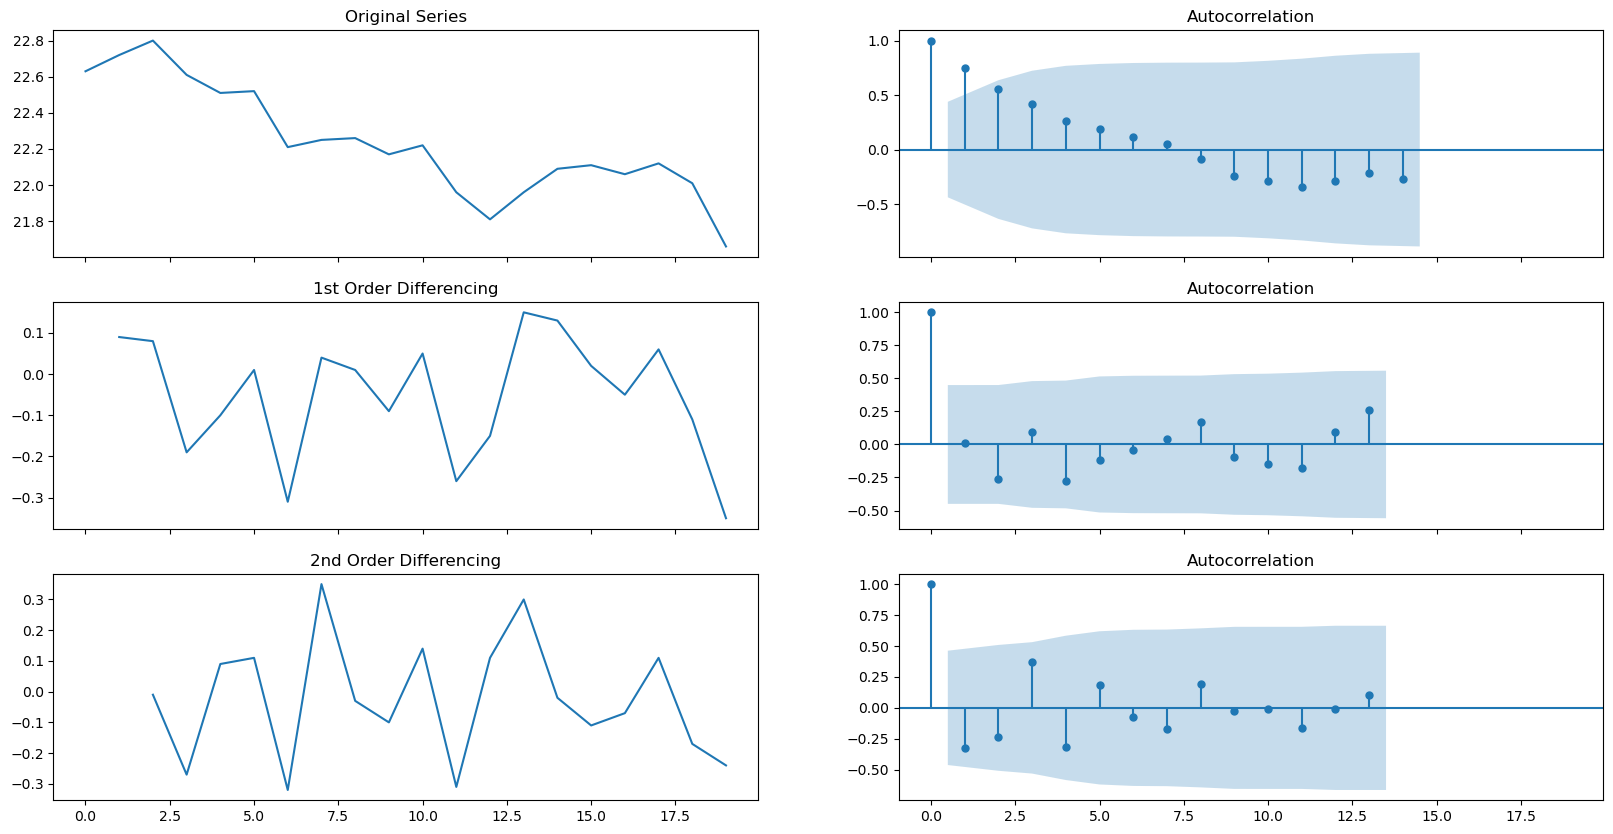

In [80]:
# Original Series
df = november_djp_df[['Adj Close']].rename(columns={'Adj Close':'adj_close'}).reset_index()[['adj_close']]
fig, axes = plt.subplots(3, 2, sharex=True, figsize=(20,10))
axes[0, 0].plot(df.adj_close); axes[0, 0].set_title('Original Series')
plot_acf(df.adj_close, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.adj_close.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.adj_close.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.adj_close.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.adj_close.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

Finding the order of AR term(p)

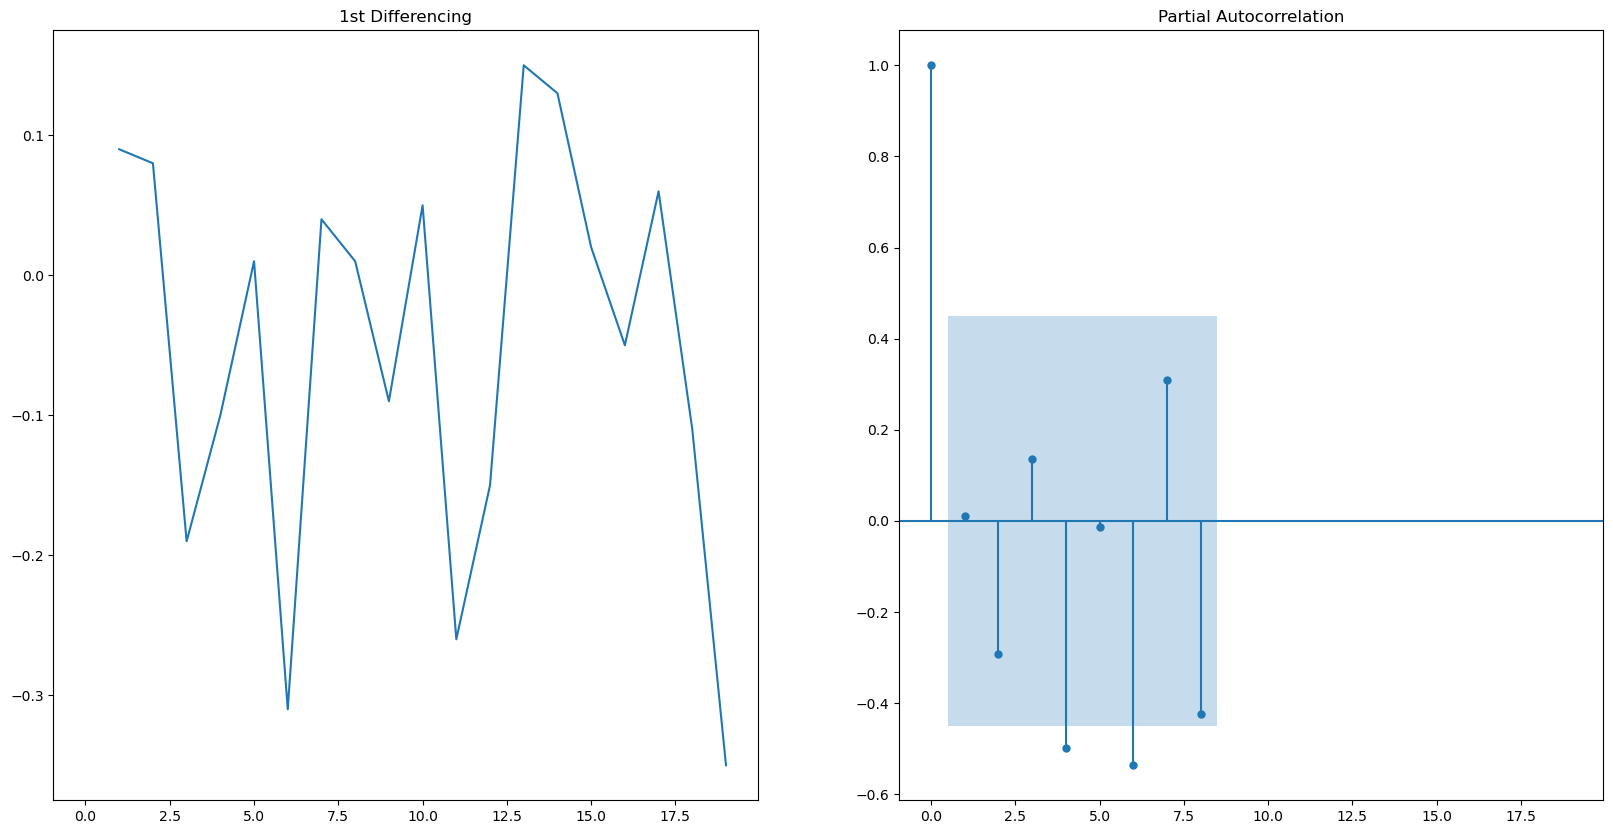

In [81]:
# PACF plot of 1st difference eries
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
axes[0].plot(df.adj_close.diff().dropna()); axes[0].set_title('1st Differencing')
plot_pacf(df.adj_close.diff().dropna(), lags=8, ax=axes[1])
plt.show()

You can observe that the PACF lag 6 is quite significant since is well above the significance line. We are going to be tentatively fix the p as 6 to be conservative.
Finding the order of MA term(q)

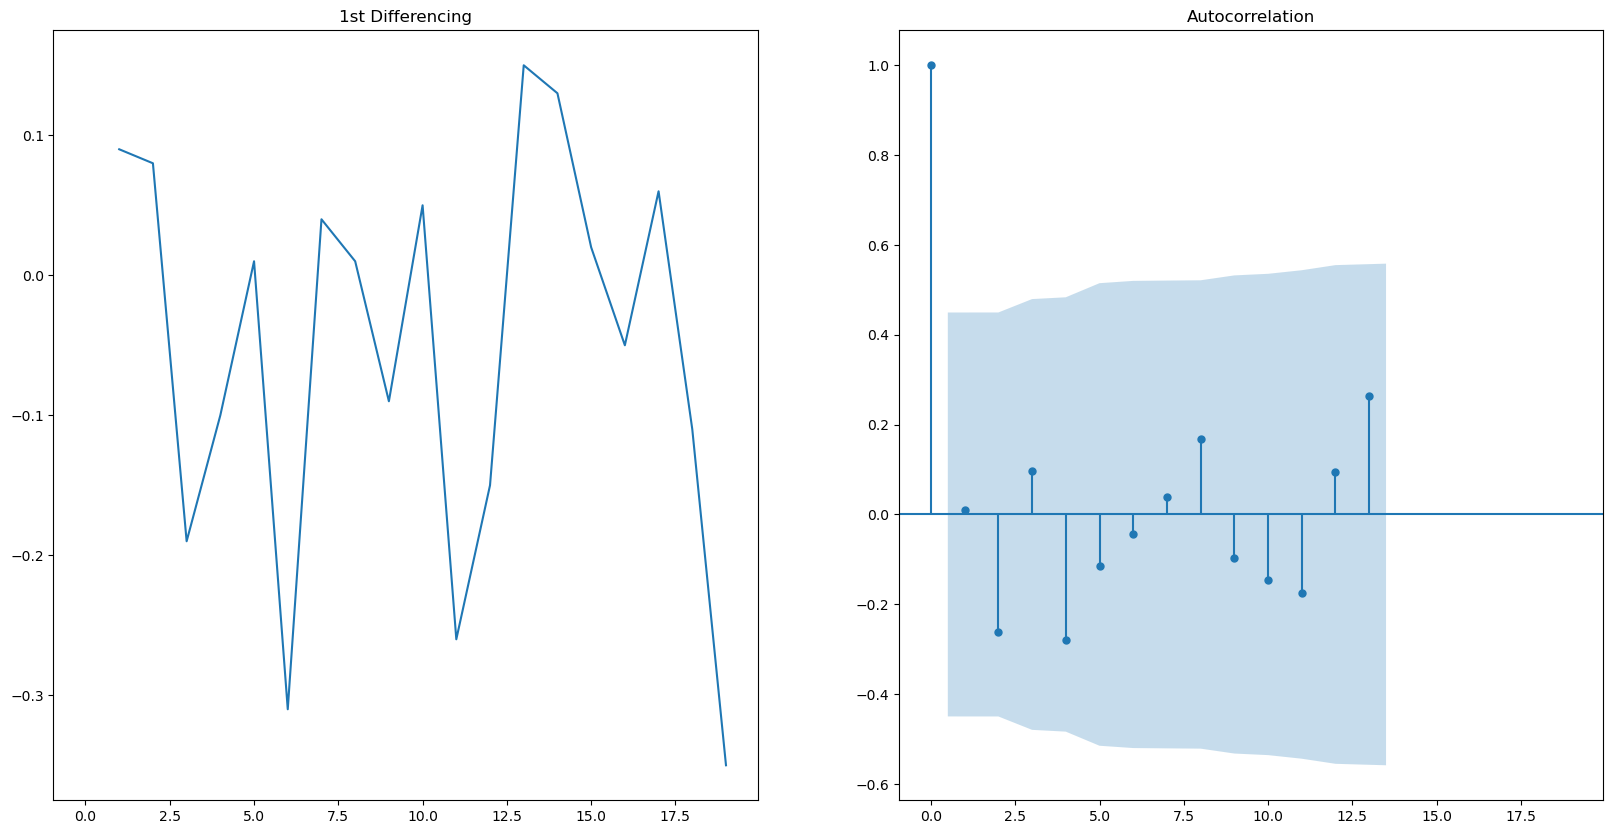

In [82]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,10))
axes[0].plot(df.adj_close.diff().dropna()); axes[0].set_title('1st Differencing')
plot_acf(df.adj_close.diff().dropna(), ax=axes[1])

plt.show()

Let’s tentatively fix q as 0.

In [83]:
# 4,1,1 ARIMA Model
model = ARIMA(df.adj_close, order=(4,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.adj_close   No. Observations:                   19
Model:                 ARIMA(4, 1, 1)   Log Likelihood                  13.724
Method:                       css-mle   S.D. of innovations              0.106
Date:                Fri, 29 Apr 2022   AIC                            -13.447
Time:                        16:30:30   BIC                             -6.836
Sample:                             1   HQIC                           -12.328
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0476      0.006     -7.746      0.000      -0.060      -0.036
ar.L1.D.adj_close     0.7301      0.211      3.459      0.001       0.316       1.144
ar.L2.D.adj_close    -0.

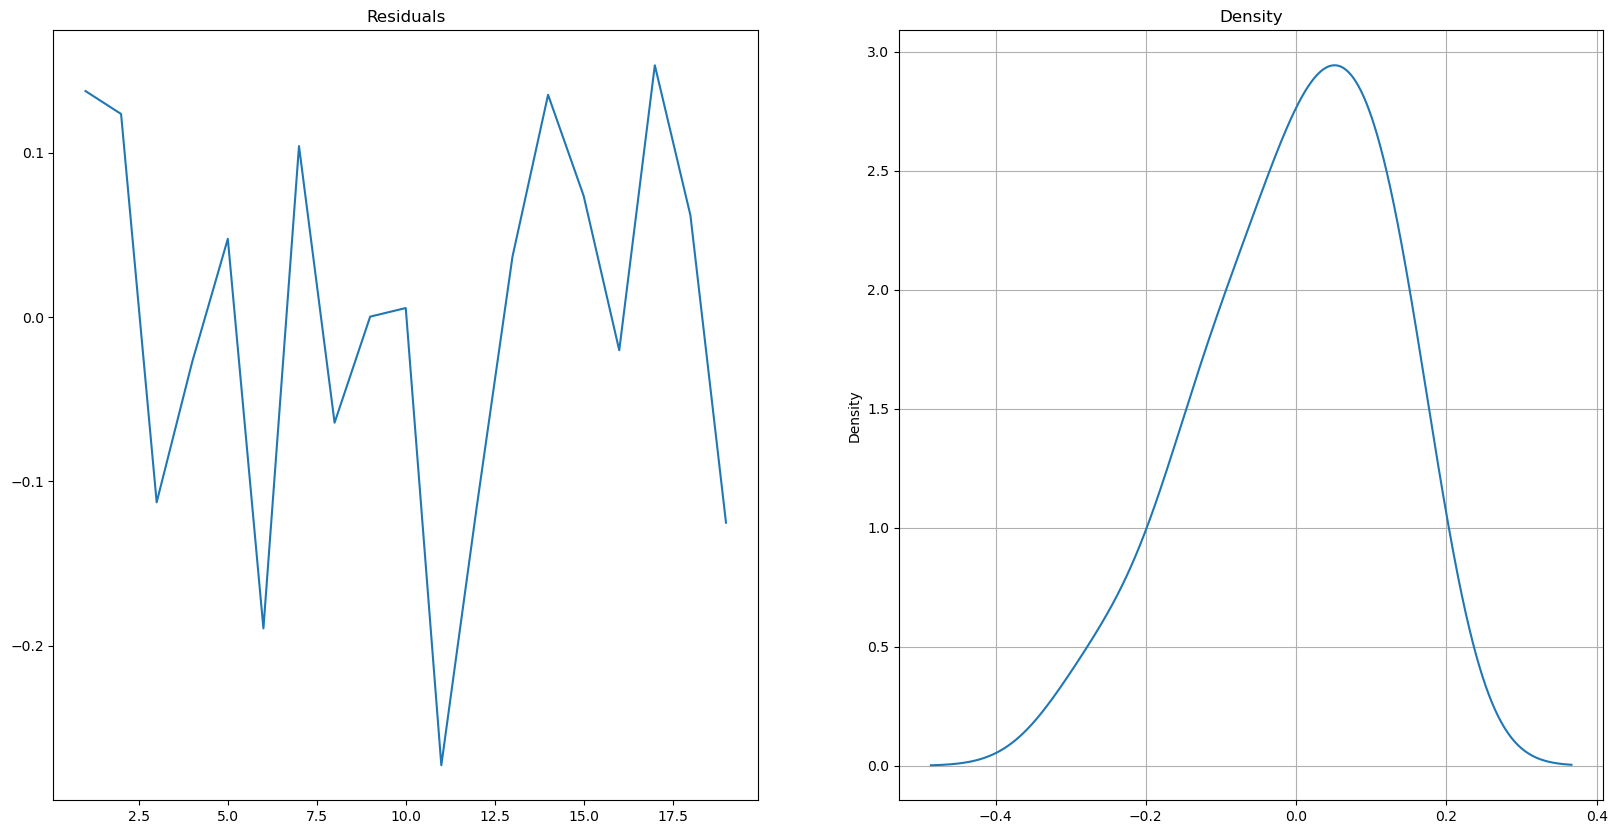

In [84]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2, figsize=(20,10))
residuals.plot(title="Residuals", ax=ax[0], legend=False)
residuals.plot(kind='kde', title='Density', ax=ax[1], legend=False, grid=True)
plt.show()

The residual errors seem fine with near zero mean and uniform variance.

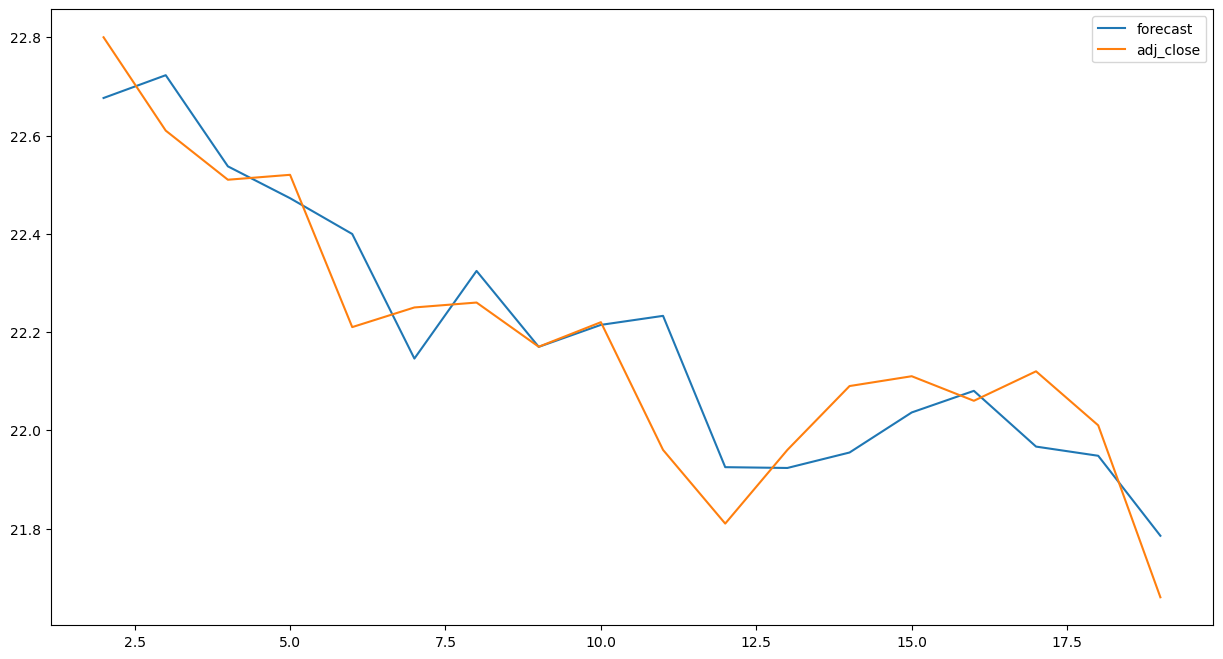

In [85]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

We choose ARIMA (4,1,1) - 4 lags, 1 time difference and 1 moving average term.

### 6.5

Gold could be modelled with an Autoregressive model with two lag and this can as well be applied to Equity ETF. In November, however, Gold ETF's best model is white noise. Nothing in the past can help us to predict the future.Only one lag helps to predict the future for an Equity ETF. The models for both Gold and Equity ETFs changed considerably from October to November.Furthermore,If we can use the model for October to predict the future,it's most likely to obtain inaccurate predictions.

## Section 7. Modelling Volatility

### 7.1

Using gold ETF price to find the daily high minus low for each month and Computing averages for October and November.

In [86]:
october_gld_df = gld_df[gld_df.index.month == 10]
#print(october_gld_df.info())

In [87]:
print(october_gld_df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-10-01  138.070007  140.190002  137.800003  139.630005  139.630005   
2019-10-02  140.789993  141.880005  140.460007  141.259995  141.259995   
2019-10-03  141.360001  143.250000  141.289993  141.899994  141.899994   
2019-10-04  141.479996  142.309998  141.139999  141.899994  141.899994   
2019-10-07  141.160004  141.770004  140.240005  140.690002  140.690002   

              Volume  
Date                  
2019-10-01  12476200  
2019-10-02  11914300  
2019-10-03  12396100  
2019-10-04   9651000  
2019-10-07   6127200  


In [88]:
oct_daily_HL = october_gld_df['High'] - october_gld_df['Low']
print('Average daily high minus low (October): {:.5f}'.format(oct_daily_HL.mean()))

Average daily high minus low (October): 1.08131


In [89]:
november_gld_df = gld_df[gld_df.index.month == 11]
#print(november_gld_df.info())

In [90]:
print(november_gld_df.head())

                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2019-11-01  142.210007  142.899994  142.009995  142.559998  142.559998   
2019-11-04  142.259995  142.449997  141.740005  142.149994  142.149994   
2019-11-05  140.649994  140.889999  139.380005  139.850006  139.850006   
2019-11-06  140.119995  140.789993  140.000000  140.449997  140.449997   
2019-11-07  140.110001  140.199997  137.600006  138.270004  138.270004   

              Volume  
Date                  
2019-11-01   8090000  
2019-11-04   4740300  
2019-11-05  11782300  
2019-11-06   6416500  
2019-11-07  15214200  


In [91]:
nov_daily_HL = november_gld_df['High'] - november_gld_df['Low']
print('Average daily high minus low (November): {:.5f}'.format(nov_daily_HL.mean()))

Average daily high minus low (November): 0.97250


### 7.2

Using the gold ETF returns, find the standard deviation for October. Repeat for November

In [93]:
daily_return_gld_oct = october_gld_df['Adj Close'].pct_change()[1:]
print('Standard deviation daily return (October): {:.5f}'.format(daily_return_gld_oct.std()))

Standard deviation daily return (October): 0.00617


In [94]:
daily_return_gld_nov = november_gld_df['Adj Close'].pct_change()[1:]
print('Standard deviation daily return (November): {:.5f}'.format(daily_return_gld_nov.std()))

Standard deviation daily return (November): 0.00633


### 7.3

Using the October and November gold ETF returns to estimate GARCH(1,1) model.

In [95]:
rets_gld_oct = 100 * gld_df[gld_df.index.month == 10].pct_change()[1:]['Adj Close']
print(rets_gld_oct.head())

Date
2019-10-02    1.167363
2019-10-03    0.453065
2019-10-04    0.000000
2019-10-07   -0.852707
2019-10-08    0.874260
Name: Adj Close, dtype: float64


#### GARCH(1,1) model for October.

In [96]:
garch = arch_model(rets_gld_oct, mean='Zero', vol='GARCH', p=1, o=0, q=1).fit(disp='off')
print(garch.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.045
Vol Model:                      GARCH   Log-Likelihood:               -20.1934
Distribution:                  Normal   AIC:                           46.3869
Method:            Maximum Likelihood   BIC:                           49.6600
                                        No. Observations:                   22
Date:                Fri, Apr 29 2022   Df Residuals:                       22
Time:                        16:41:12   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0463  6.326e-02      0.732      0.464 

In [97]:
rets_gld_nov = 100 * gld_df[gld_df.index.month == 11].pct_change()[1:]['Adj Close']
print(rets_gld_nov.head())

Date
2019-11-04   -0.287601
2019-11-05   -1.618001
2019-11-06    0.429025
2019-11-07   -1.552149
2019-11-08   -0.636439
Name: Adj Close, dtype: float64


#### GARCH(1,1) model for November.

In [98]:
garch = arch_model(rets_gld_nov, mean='Zero', vol='GARCH', p=1, o=0, q=1).fit(disp='off')
print(garch.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.053
Vol Model:                      GARCH   Log-Likelihood:               -17.0199
Distribution:                  Normal   AIC:                           40.0399
Method:            Maximum Likelihood   BIC:                           42.8732
                                        No. Observations:                   19
Date:                Fri, Apr 29 2022   Df Residuals:                       19
Time:                        16:43:46   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0131  2.974e-02      0.440      0.660 

### 7.4

GARCH (1,1) =ω+αϵ2t−1+βσt−1 

α is often interpreted as the short run presistence where β denotes the long run persistence

We used the zero mean GARCH model.

For October, ETF Gold GARCH (1,1) model:

GARCH(ω,α,β) = (1.0201e-05, 1.0000e-02 , 0.8526) Estimated GARCH volatility persistence = α+β=0.85

For November, ETF Gold GARCH (1,1) model:GARCH(ω,β) = (0.0131, 0.0000, 0.8985) Estimated GARCH volatility persistence =α+β=0.89

Alpha and Omega are not significant for both models.

Conclusion: GARCH model for November has higher persistence, so volatility changes less over time and hence its better.

Information criteria are also lower in Novemer meaning that this model is better.
Omega is an intercept of variance and scews to the left in November.
Overally, we need to look further for better model for our portfolio.

### 7.5

Using equity ETF prices, find the daily high minus low for each month. Compute the average for October. Compute the average for November

In [99]:
october_djp_df = djp_df[gld_df.index.month == 10]
#print(october_djp_df.info())

In [100]:
print(october_djp_df.head())

                 Open       High        Low  Close  Adj Close   Volume
Date                                                                  
2019-10-01  21.820000  21.820000  21.740000  21.82      21.82  1489800
2019-10-02  21.770000  21.820000  21.610001  21.68      21.68   151400
2019-10-03  21.540001  21.780001  21.530001  21.75      21.75    93000
2019-10-04  21.750000  21.860001  21.750000  21.83      21.83    99300
2019-10-07  21.990000  21.990000  21.709999  21.73      21.73   100300


In [101]:
oct_daily_HL = october_djp_df['High'] - october_djp_df['Low']
print('Average daily high minus low (October): {:.5f}'.format(oct_daily_HL.mean()))

Average daily high minus low (October): 0.16348


In [102]:
november_djp_df = djp_df[djp_df.index.month == 11]
#print(november_djp_df.info())

In [103]:
print(november_djp_df.head())

                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2019-11-01  22.350000  22.639999  22.350000  22.629999  22.629999  1202900
2019-11-04  22.780001  22.820000  22.700001  22.719999  22.719999   225300
2019-11-05  22.760000  22.799999  22.730000  22.799999  22.799999   367300
2019-11-06  22.740000  22.790001  22.570000  22.610001  22.610001   107200
2019-11-07  22.660000  22.680000  22.500000  22.510000  22.510000   108500


In [104]:
nov_daily_HL = november_djp_df['High'] - november_djp_df['Low']
print('Average daily high minus low (November): {:.5f}'.format(nov_daily_HL.mean()))

Average daily high minus low (November): 0.15200


### 7.6

Using equity ETF returns, find the standard deviation for October. Repeat for November

In [105]:
daily_return_djp_oct = october_djp_df['Adj Close'].pct_change()[1:]
print('Standard deviation daily return (October): {:.5f}'.format(daily_return_djp_oct.std()))

Standard deviation daily return (October): 0.00480


In [106]:
daily_return_djp_nov = november_djp_df['Adj Close'].pct_change()[1:]
print('Standard deviation daily return (November): {:.5f}'.format(daily_return_djp_nov.std()))

Standard deviation daily return (November): 0.00662


### 7.7

Using equity ETF returns, find the standard deviation for October. Repeat for November

In [107]:
rets_djp_oct = 100 * djp_df[djp_df.index.month == 10].pct_change()[1:]['Adj Close']
print(rets_djp_oct.head())

Date
2019-10-02   -0.641610
2019-10-03    0.322877
2019-10-04    0.367816
2019-10-07   -0.458087
2019-10-08    0.230102
Name: Adj Close, dtype: float64


#### GARCH(1,1) model.

In [108]:
garch = arch_model(rets_djp_oct, mean='Zero', vol='GARCH', p=1, o=0, q=1).fit(disp='off')
print(garch.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.045
Vol Model:                      GARCH   Log-Likelihood:               -14.9781
Distribution:                  Normal   AIC:                           35.9563
Method:            Maximum Likelihood   BIC:                           39.2294
                                        No. Observations:                   22
Date:                Fri, Apr 29 2022   Df Residuals:                       22
Time:                        17:01:00   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.1345      0.101      1.338      0.181 

In [109]:
rets_djp_nov = 100 * djp_df[djp_df.index.month == 11].pct_change()[1:]['Adj Close']
print(rets_djp_nov.head())

Date
2019-11-04    0.397703
2019-11-05    0.352112
2019-11-06   -0.833327
2019-11-07   -0.442284
2019-11-08    0.044426
Name: Adj Close, dtype: float64


#### GARCH(1,1) model.

In [110]:
garch = arch_model(rets_djp_nov, mean='Zero', vol='GARCH', p=1, o=0, q=1).fit(disp='off')
print(garch.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:              Adj Close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.053
Vol Model:                      GARCH   Log-Likelihood:               -19.5870
Distribution:                  Normal   AIC:                           45.1740
Method:            Maximum Likelihood   BIC:                           48.0073
                                        No. Observations:                   19
Date:                Fri, Apr 29 2022   Df Residuals:                       19
Time:                        17:02:01   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega      7.5671e-03      0.240  3.157e-02      0.975 [ -0.462,  0.47

### 7.8

GARCH (1,1) =ω+ αϵ2t−1+β σt−1 

α is often interpreted as the short run presistence where β denotes the long run persistence.

We used the zero mean GARCH model.

For October, ETF Gold GARCH (1,1) model:

GARCH(ω,α,β) = (0.1345, 0.0000 , 0.4051) Estimated GARCH volatility persistence = α+β=0.85

For November, ETF Gold GARCH (1,1) model:

GARCH(ω,α,β) = (7.5671e-03 , 0.0000, 1.0000) Estimated GARCH volatility persistence = α+β =1.4051
All parameters are not significant for both models.

Conclusion: GARCH model for November has higher persistence, so volatility changes less over time and hence its better.

Information criteria are also lower in Novemer meaning that this model is better.

Omega is an intercept of variance and scews to the left in November significantly.

Overally, we need to find a better model for our portfolio.

## Section 8. Correlation

### 8.1

Computing the Pearson correlation between the gold and equity returns for October and November 2019.

In [111]:
x = rets_gld_oct.to_numpy()
y = rets_djp_oct.to_numpy()
print('Pearson correlation between the gold and equity returns (October): {:.5f}'\
      .format(np.corrcoef(x, y)[0,1]))

Pearson correlation between the gold and equity returns (October): -0.04172


In [112]:
x = rets_gld_nov.to_numpy()
y = rets_djp_nov.to_numpy()
print('Pearson correlation between the gold and equity returns (November): {:.5f}'\
      .format(np.corrcoef(x, y)[0,1]))

Pearson correlation between the gold and equity returns (November): -0.28379


Pearson correlation in November is higher than that one in October meaning the negative correlation has strengthen over time. However, the absolute value of correlation, equal to 0.04 and 0.28 is still low to conclude that there can be a further causation between variables. Given that, portfolio manager may want to include them both into portfolio